<a href="https://colab.research.google.com/github/kundajelab/feature_interactions/blob/master/EvaluateModelsGivenPredictionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/data/test_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/78d4a6b/data/test_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/8f97332/data/test_toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/8f97332/data/test_toanalyze_orig_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/8f97332/data/train_toanalyze_orig_neg_labels.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/8f97332/data/train_toanalyze_orig_pos_labels.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/8f97332/data/test_toanalyze_groundtruth_orig_neg.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/8f97332/data/test_toanalyze_groundtruth_orig_pos.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/8f97332/data/test_toanalyze_groundtruth_pos_interactions.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/8f97332/data/test_toanalyze_groundtruth_neg_maineff.txt.gz

!wget https://github.com/kundajelab/feature_interactions/raw/8f97332/data/shuff_toanalyze_orig_oraclepred_neg.txt.gz
!wget https://github.com/kundajelab/feature_interactions/raw/8f97332/data/shuff_toanalyze_orig_oraclepred_pos.txt.gz

--2020-07-02 13:13:18--  https://github.com/kundajelab/feature_interactions/raw/78d4a6b/data/test_neg_labels.txt.gz
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kundajelab/feature_interactions/78d4a6bb7cc34b940fa2b68dba2c7fb91141a165/data/test_neg_labels.txt.gz [following]
--2020-07-02 13:13:18--  https://raw.githubusercontent.com/kundajelab/feature_interactions/78d4a6bb7cc34b940fa2b68dba2c7fb91141a165/data/test_neg_labels.txt.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 523456 (511K) [application/octet-stream]
Saving to: ‘test_neg_labels.txt.gz’

test_neg_labels.txt 100%[===================

In [3]:
!gunzip -f *.gz

In [4]:
!md5sum *

md5sum: sample_data: Is a directory
8e52285ee2f15517a1260686c8e7be73  shuff_toanalyze_orig_oraclepred_neg.txt
0c3212b2a62a223c74bcb6f92257abfb  shuff_toanalyze_orig_oraclepred_pos.txt
0bca4454a44d8dd25d7c64faae57a8ec  test_neg_labels.txt
292a1b03299bf7877bbc70746112d7bd  test_pos_labels.txt
6fc0d1c485bd5c58e8e28c9c0750a236  test_toanalyze_groundtruth_neg_maineff.txt
8b8986c8d1b04a707a08bab0ad6c2a7e  test_toanalyze_groundtruth_orig_neg.txt
89434eb455b64fb551915e8f069d5570  test_toanalyze_groundtruth_orig_pos.txt
db8bca2c8062d6deac54ea900a2f8570  test_toanalyze_groundtruth_pos_interactions.txt
46a3795781b463582902f256cf067ffe  test_toanalyze_orig_neg_labels.txt
e9a2286f5839f28d779c326974fd3351  test_toanalyze_orig_pos_labels.txt
4d8197807ceb9b53fb144d378e287962  train_toanalyze_orig_neg_labels.txt
f4927967e916c5a64f5506a86eacbdc3  train_toanalyze_orig_pos_labels.txt


In [5]:
!wget https://github.com/kundajelab/feature_interactions/raw/35f20ae/model_preds.tgz
!tar -xzf model_preds.tgz model_preds

--2020-07-02 13:13:40--  https://github.com/kundajelab/feature_interactions/raw/35f20ae/model_preds.tgz
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kundajelab/feature_interactions/35f20ae08bac2ea361a0716a5d6d48d44d9d0cdf/model_preds.tgz [following]
--2020-07-02 13:13:40--  https://raw.githubusercontent.com/kundajelab/feature_interactions/35f20ae08bac2ea361a0716a5d6d48d44d9d0cdf/model_preds.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63648443 (61M) [application/octet-stream]
Saving to: ‘model_preds.tgz’

model_preds.tgz     100%[===================>]  60.70M   157MB/s    in 0.4s    

2020-

In [6]:
import numpy as np


#this is set up for 1d convolutions where examples
#have dimensions (len, num_channels) 
#the channel axis is the axis for one-hot encoding.
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return


def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1


def anscombe_transform(vals):
  assert np.min(vals)>=(-3.0/8), np.min(vals)
  return 2*np.sqrt(vals + 3.0/8)


def inverse_anscombe_transform(vals):
  return np.square(vals/2.0) - 3.0/8


def load_onehot_sequences(filename):
  return np.array([one_hot_encode_along_channel_axis(x.rstrip())
                   for x in open(filename)])


def load_numerical(filename):
  return np.array([float(x.rstrip()) for x in open(filename)])


def read_labels_and_oracle(filename):
  labels = np.array([float(x.split("\t")[0]) for
                      x in open(filename)])
  oracle = np.array([float(x.split("\t")[1]) for
                      x in open(filename)])
  return labels, oracle


test_pos_labels, test_pos_oracle =\
  read_labels_and_oracle("test_pos_labels.txt")
test_neg_labels, test_neg_oracle =\
  read_labels_and_oracle("test_neg_labels.txt")

test_toanalyze_orig_neg_labels =\
  load_numerical("test_toanalyze_orig_neg_labels.txt")
test_toanalyze_orig_pos_labels =\
  load_numerical("test_toanalyze_orig_pos_labels.txt")

train_toanalyze_orig_neg_labels =\
  load_numerical("train_toanalyze_orig_neg_labels.txt")
train_toanalyze_orig_pos_labels =\
  load_numerical("train_toanalyze_orig_pos_labels.txt")

test_toanalyze_groundtruth_neg_maineff=\
  load_numerical("test_toanalyze_groundtruth_neg_maineff.txt")
test_toanalyze_groundtruth_pos_interactions=\
  load_numerical("test_toanalyze_groundtruth_pos_interactions.txt")

shuff_toanalyze_orig_oraclepred_neg =\
  load_numerical("shuff_toanalyze_orig_oraclepred_neg.txt")
shuff_toanalyze_orig_oraclepred_pos =\
  load_numerical("shuff_toanalyze_orig_oraclepred_pos.txt")

In [11]:
from collections import namedtuple
import scipy.stats
import h5py
import numpy as np
from matplotlib import pyplot as plt


def anscombemse_loss(preds, labels):
  return np.square(anscombe_transform(preds)-anscombe_transform(labels))


#positive means interaction improved the loss
def compute_lossimprovement(orig_preds, maineff_preds, labels,
                            lossfunc, valthresh):
  assert np.min(orig_preds) > valthresh, np.min(orig_preds)
  assert np.min(labels) > valthresh, np.min(labels)
  #for anscomebmse: for the purpose of avoiding taking sqrt of negative number,
  # make sure maineff preds > (-3.0/8).
  #The reason we can get smaller
  # maineff preds than this is that we are computing main effects in counts
  # space, whereas model predictions are in anscombe transform space.
  if (np.min(maineff_preds) < valthresh):
    print("Warning: too-low maineff preds in % examples:",
          np.mean(maineff_preds < valthresh))
    maineff_preds = np.maximum(maineff_preds, valthresh)
  
  maineffpreds_loss = lossfunc(preds=maineff_preds, labels=labels)
  origpreds_loss = lossfunc(preds=orig_preds, labels=labels)

  return ((maineffpreds_loss - origpreds_loss),
          maineffpreds_loss, origpreds_loss)


InteractionEffectData = namedtuple("InteractionEffectData",
  ["orig_preds", "A_main_eff", "B_main_eff", "inter_eff", "maineff_preds"])


def get_interactioneffectdata(modelpredsfile, perturbedseqskey):
  model_h5 = h5py.File(modelpredsfile, "r")
  orig_preds = np.array(model_h5[perturbedseqskey]['orig_onehot_preds'])
  Aoff_preds = np.array(model_h5[perturbedseqskey]['Aoff_onehot_preds'])
  Boff_preds = np.array(model_h5[perturbedseqskey]['Boff_onehot_preds'])
  bothoff_preds = np.array(model_h5[perturbedseqskey]['bothoff_onehot_preds'])
  model_h5.close()

  A_main_eff = (Boff_preds - bothoff_preds)
  B_main_eff = (Aoff_preds - bothoff_preds)
  inter_eff = (orig_preds - bothoff_preds) - (A_main_eff + B_main_eff)
  maineff_preds = bothoff_preds + A_main_eff + B_main_eff

  return InteractionEffectData(orig_preds=orig_preds, A_main_eff=A_main_eff,
                               B_main_eff=B_main_eff, inter_eff=inter_eff,
                               maineff_preds=maineff_preds)


InteractionAnalysis = namedtuple("InteractionAnalysis",
  [
   "overall_test_loss",
   "test_toanalyze_maineffpreds_loss",
   "test_toanalyze_origpreds_loss",
   
   "test_toanalyze_interactioneffectdata",
   "test_toanalyze_lossimprovement",
   
   "controltest_toanalyze_lossimprovement",

   "shuff_toanalyze_interactioneffectdata",
   "shuff_toanalyze_lossimprovement",

   "train_toanalyze_interactioneffectdata",
   "train_toanalyze_lossimprovement",

   "controltrain_toanalyze_lossimprovement",
   
   "test_toanalyze_intereff_wilcoxon",
   "test_toanalyze_lossimprovement_wilcoxon",
   "test_toanalyze_lossimprovement_mannwhit",
   "test_v_controltest_lossimp_mannwhit",
   "test_v_controltest_intereff_mag_mannwhit",
   
   "train_toanalyze_lossimprovement_wilcoxon",
   "train_toanalyze_lossimprovement_mannwhit",
   "train_v_controltrain_lossimp_mannwhit",
   "train_v_test_lossimp_mannwhit",
   "train_v_controltrain_intereff_mag_mannwhit",

   "test_v_shuff_intereff_mag_mannwhit",
   "test_v_shuff_lossimp_mannwhit"
   ])


def perform_interaction_analysis(modelpredsfile,
                                 all_test_labels,
                                 all_test_oracle,
                                 test_toanalyze_labels,
                                 train_toanalyze_labels,
                                 shuff_toanalyze_oraclepreds,
                                 lossfunc, valthresh):
  overall_test_loss = lossfunc(
        preds=np.array(h5py.File(modelpredsfile,"r")["all_test_preds"][:]),
        labels=all_test_labels)
  print("overall test loss", np.mean(overall_test_loss))
  
  test_toanalyze_interactioneffectdata = get_interactioneffectdata(
          modelpredsfile=modelpredsfile,
          perturbedseqskey='test_toanalyze_perturbedseqs')
  
  
  if ("negcontrol" in modelpredsfile):
    print(modelpredsfile)
    plt.scatter(np.array(h5py.File(modelpredsfile,"r")["all_test_preds"][:]),
                all_test_oracle, alpha=0.01)
    plt.plot(all_test_oracle, all_test_oracle, color="black")
    plt.xlabel("Test Preds")
    plt.ylabel("Test Oracle")
    plt.show()

    pred_maineff = (test_toanalyze_interactioneffectdata.A_main_eff
                    + test_toanalyze_interactioneffectdata.B_main_eff)
    plt.scatter(test_toanalyze_groundtruth_neg_maineff, pred_maineff)
    plt.plot(test_toanalyze_groundtruth_neg_maineff,
            test_toanalyze_groundtruth_neg_maineff,
            color="black")
    plt.xlabel("(Neg control) ground truth A_main_eff + B_main_eff")
    plt.ylabel("Pred A_main_eff + B_main_eff")
    plt.show()

    mainefferror = test_toanalyze_groundtruth_neg_maineff - pred_maineff
    intereff = test_toanalyze_interactioneffectdata.inter_eff
    plt.scatter(mainefferror, intereff)
    plt.plot(mainefferror, mainefferror, color="black")
    plt.xlabel("mainefferror")
    plt.ylabel("intereff")
    plt.show()

  controltest_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='controltest_toanalyze_perturbedseqs')

  (test_toanalyze_lossimprovement, test_toanalyze_maineffpreds_loss,
   test_toanalyze_origpreds_loss)= compute_lossimprovement(
      orig_preds=test_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=test_toanalyze_interactioneffectdata.maineff_preds,
      labels=test_toanalyze_labels,
      lossfunc=lossfunc, valthresh=valthresh)
  controltest_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=controltest_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=controltest_toanalyze_interactioneffectdata.maineff_preds,
      labels=test_toanalyze_labels,
      lossfunc=lossfunc, valthresh=valthresh)
  
  train_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='train_toanalyze_perturbedseqs')
  controltrain_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='controltrain_toanalyze_perturbedseqs')
  
  (train_toanalyze_lossimprovement, train_toanalyze_maineffpreds_loss,
   train_toanalyze_origpreds_loss) = compute_lossimprovement(
      orig_preds=train_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=train_toanalyze_interactioneffectdata.maineff_preds,
      labels=train_toanalyze_labels,
      lossfunc=lossfunc, valthresh=valthresh)
  controltrain_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=controltrain_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=controltrain_toanalyze_interactioneffectdata.maineff_preds,
      labels=train_toanalyze_labels,
      lossfunc=lossfunc, valthresh=valthresh)
  
  shuff_toanalyze_interactioneffectdata = get_interactioneffectdata(
        modelpredsfile=modelpredsfile,
        perturbedseqskey='shuff_toanalyze_perturbedseqs')
  shuff_toanalyze_lossimprovement,_,_ = compute_lossimprovement(
      orig_preds=shuff_toanalyze_interactioneffectdata.orig_preds,
      maineff_preds=shuff_toanalyze_interactioneffectdata.maineff_preds,
      labels=shuff_toanalyze_oraclepreds,
      lossfunc=lossfunc, valthresh=valthresh)
  
  test_toanalyze_intereff_wilcoxon = scipy.stats.wilcoxon(
      x=test_toanalyze_interactioneffectdata.inter_eff,
      alternative="two-sided")
  
  test_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=test_toanalyze_lossimprovement,
    alternative="greater")
  test_toanalyze_lossimprovement_mannwhit = scipy.stats.mannwhitneyu(
    x=test_toanalyze_maineffpreds_loss,
    y=test_toanalyze_origpreds_loss,
    alternative="greater")
  test_v_controltest_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=test_toanalyze_lossimprovement,
      y=controltest_toanalyze_lossimprovement,
      alternative="greater")
  test_v_controltest_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(test_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(controltest_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  
  train_toanalyze_lossimprovement_wilcoxon = scipy.stats.wilcoxon(
    x=train_toanalyze_lossimprovement,
    alternative="greater")
  train_toanalyze_lossimprovement_mannwhit = scipy.stats.mannwhitneyu(
    x=train_toanalyze_maineffpreds_loss,
    y=train_toanalyze_origpreds_loss,
    alternative="greater")
  train_v_controltrain_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=train_toanalyze_lossimprovement,
      y=controltrain_toanalyze_lossimprovement,
      alternative="greater")
  train_v_controltrain_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(train_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(controltrain_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  
  train_v_test_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=train_toanalyze_lossimprovement,
      y=test_toanalyze_lossimprovement,
      alternative="greater")
  
  test_v_shuff_intereff_mag_mannwhit = scipy.stats.mannwhitneyu(
      x=np.abs(test_toanalyze_interactioneffectdata.inter_eff),
      y=np.abs(shuff_toanalyze_interactioneffectdata.inter_eff),
      alternative="greater")
  test_v_shuff_lossimp_mannwhit = scipy.stats.mannwhitneyu(
      x=test_toanalyze_lossimprovement,
      y=shuff_toanalyze_lossimprovement,
      alternative="greater")
  
  return InteractionAnalysis(
      
      overall_test_loss=overall_test_loss,
      test_toanalyze_maineffpreds_loss=test_toanalyze_maineffpreds_loss,
      test_toanalyze_origpreds_loss=test_toanalyze_origpreds_loss,

      test_toanalyze_interactioneffectdata=
        test_toanalyze_interactioneffectdata,
      test_toanalyze_lossimprovement=test_toanalyze_lossimprovement,

      controltest_toanalyze_lossimprovement=
       controltest_toanalyze_lossimprovement,
      
      shuff_toanalyze_interactioneffectdata=
        shuff_toanalyze_interactioneffectdata,
      shuff_toanalyze_lossimprovement=
        shuff_toanalyze_lossimprovement,

      train_toanalyze_interactioneffectdata=
        train_toanalyze_interactioneffectdata,
      train_toanalyze_lossimprovement=train_toanalyze_lossimprovement,

      controltrain_toanalyze_lossimprovement=
        controltrain_toanalyze_lossimprovement,

      test_toanalyze_intereff_wilcoxon=
        test_toanalyze_intereff_wilcoxon,
      test_toanalyze_lossimprovement_wilcoxon=
        test_toanalyze_lossimprovement_wilcoxon,
      test_toanalyze_lossimprovement_mannwhit=
        test_toanalyze_lossimprovement_mannwhit,
      test_v_controltest_lossimp_mannwhit=
        test_v_controltest_lossimp_mannwhit,
      test_v_controltest_intereff_mag_mannwhit=
        test_v_controltest_intereff_mag_mannwhit,
      
      train_toanalyze_lossimprovement_wilcoxon=
        train_toanalyze_lossimprovement_wilcoxon,
      train_toanalyze_lossimprovement_mannwhit=
        train_toanalyze_lossimprovement_mannwhit,
      train_v_controltrain_lossimp_mannwhit=
        train_v_controltrain_lossimp_mannwhit,
      train_v_controltrain_intereff_mag_mannwhit=
        train_v_controltrain_intereff_mag_mannwhit,

      train_v_test_lossimp_mannwhit=train_v_test_lossimp_mannwhit,

      test_v_shuff_intereff_mag_mannwhit=test_v_shuff_intereff_mag_mannwhit,
      test_v_shuff_lossimp_mannwhit=test_v_shuff_lossimp_mannwhit
    )

In [12]:
import glob

MODEL_PREDS_FOLDER = "model_preds"
negcontrol_modelpredsfiles =\
  glob.glob(MODEL_PREDS_FOLDER+"/negcontrol_*_seed*.h5")
poscontrol_modelpredsfiles =\
  glob.glob(MODEL_PREDS_FOLDER+"/poscontrol_*_seed*.h5")

On model model_preds/negcontrol_model-arch3_l1reg-0.0001_seed400_cnrkp.h5
overall test loss 1.3992054340057674
model_preds/negcontrol_model-arch3_l1reg-0.0001_seed400_cnrkp.h5


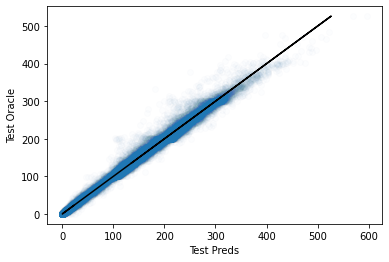

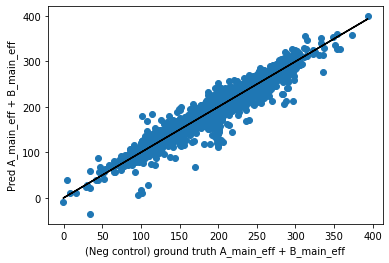

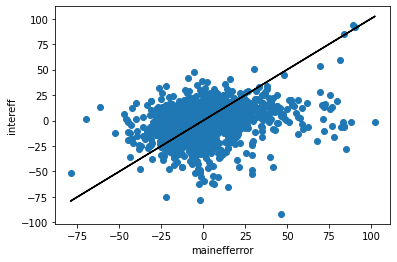

On model model_preds/negcontrol_model-arch1_l1reg-0.001_seed400_rmcsj.h5
overall test loss 1.718147853303547
model_preds/negcontrol_model-arch1_l1reg-0.001_seed400_rmcsj.h5


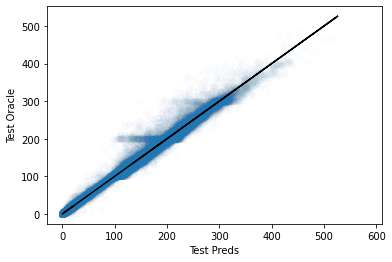

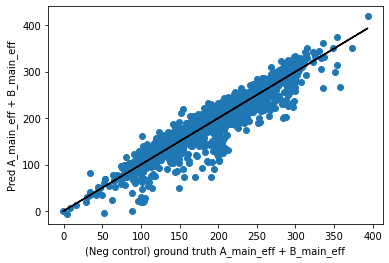

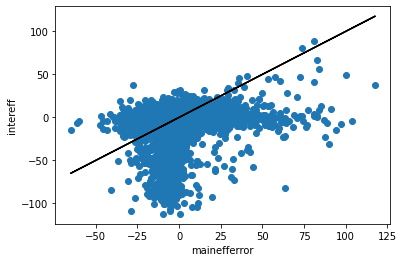

On model model_preds/negcontrol_model-arch3_l1reg-0.0_seed500_tgrnm.h5
overall test loss 1.5381711546052588
model_preds/negcontrol_model-arch3_l1reg-0.0_seed500_tgrnm.h5


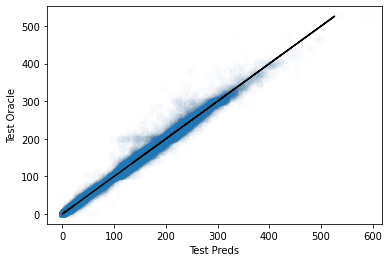

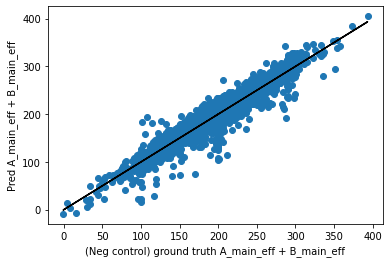

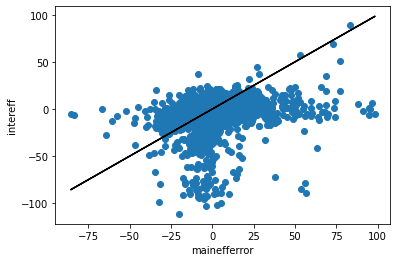

On model model_preds/negcontrol_model-arch1_l1reg-0.0001_seed100_onrdk.h5
overall test loss 1.5221237071734937
model_preds/negcontrol_model-arch1_l1reg-0.0001_seed100_onrdk.h5


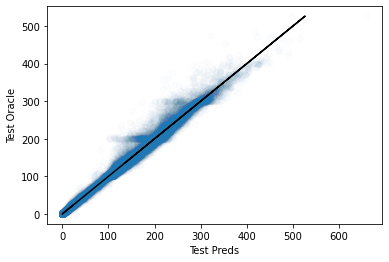

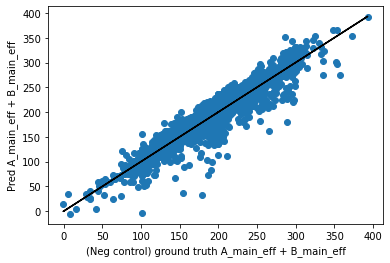

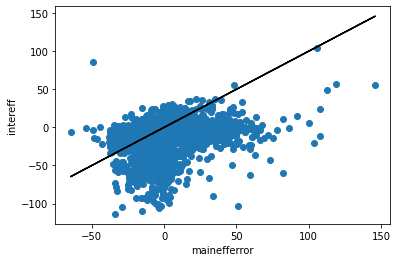

On model model_preds/negcontrol_model-arch1_l1reg-0.0_seed500_kezkm.h5
overall test loss 1.5896775275545034
model_preds/negcontrol_model-arch1_l1reg-0.0_seed500_kezkm.h5


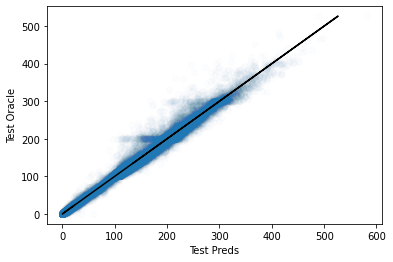

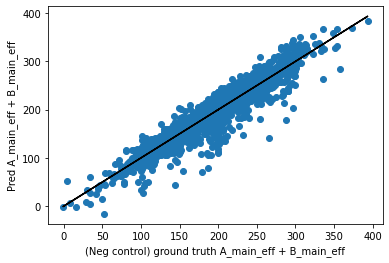

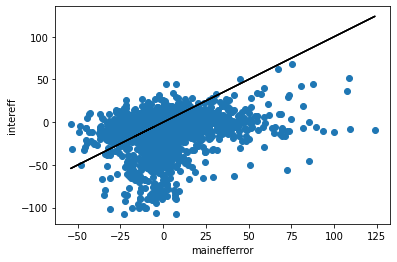

On model model_preds/negcontrol_model-arch1_l1reg-0.001_seed300_eiemt.h5
overall test loss 1.464630569677999
model_preds/negcontrol_model-arch1_l1reg-0.001_seed300_eiemt.h5


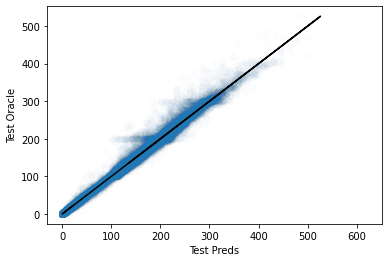

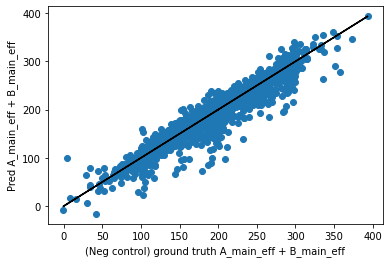

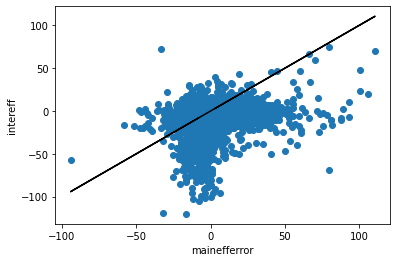

On model model_preds/negcontrol_model-arch2_l1reg-0.0001_seed100_xvwjk.h5
overall test loss 1.8316339895355656
model_preds/negcontrol_model-arch2_l1reg-0.0001_seed100_xvwjk.h5


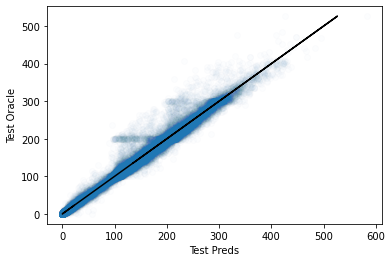

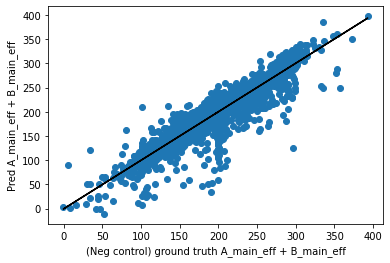

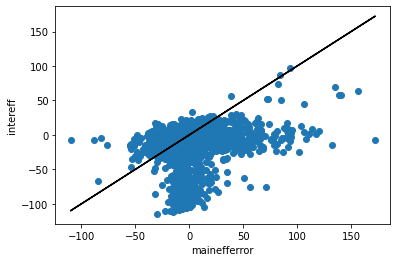

On model model_preds/negcontrol_model-arch3_l1reg-0.0_seed400_nvrfe.h5
overall test loss 1.6272965439326987
model_preds/negcontrol_model-arch3_l1reg-0.0_seed400_nvrfe.h5


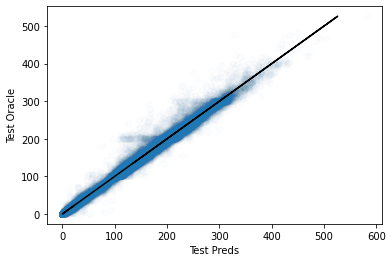

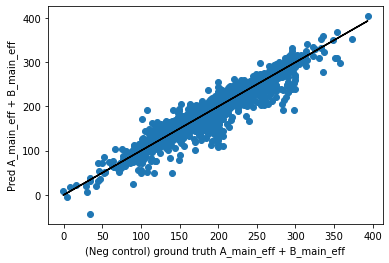

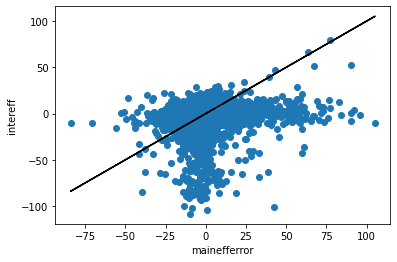

On model model_preds/negcontrol_model-arch2_l1reg-0.0_seed500_yxgnt.h5
overall test loss 1.5944960815966671
model_preds/negcontrol_model-arch2_l1reg-0.0_seed500_yxgnt.h5


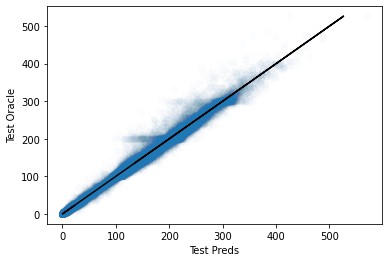

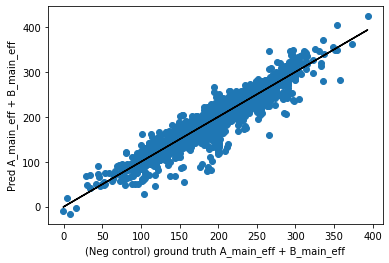

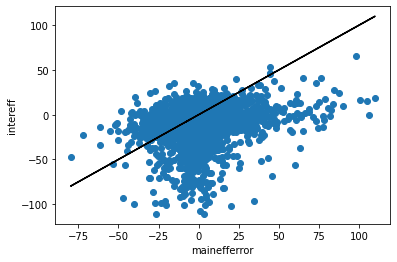

On model model_preds/negcontrol_model-arch1_l1reg-0.0001_seed400_ujfkj.h5
overall test loss 1.6211058865631605
model_preds/negcontrol_model-arch1_l1reg-0.0001_seed400_ujfkj.h5


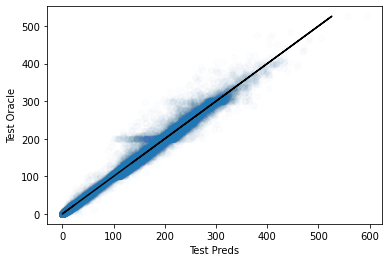

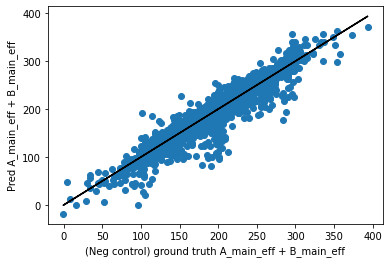

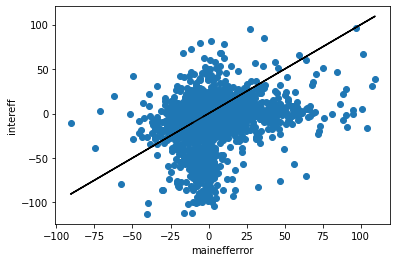

On model model_preds/negcontrol_model-arch3_l1reg-0.0001_seed500_vcqvx.h5
overall test loss 1.594184462506023
model_preds/negcontrol_model-arch3_l1reg-0.0001_seed500_vcqvx.h5


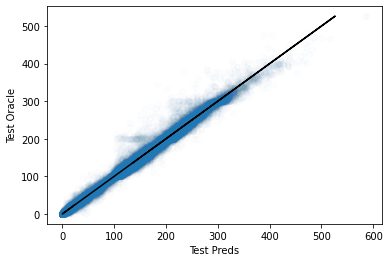

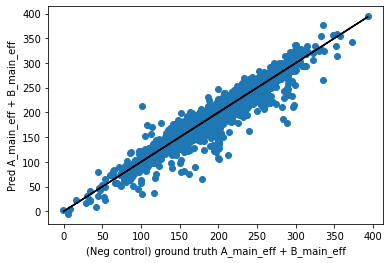

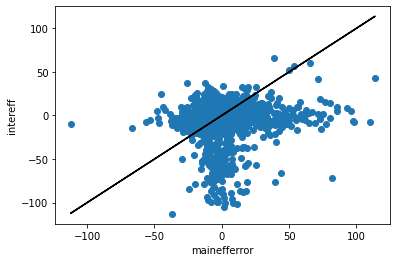

On model model_preds/negcontrol_model-arch2_l1reg-0.0_seed100_lvgiv.h5
overall test loss 1.6649195201790077
model_preds/negcontrol_model-arch2_l1reg-0.0_seed100_lvgiv.h5


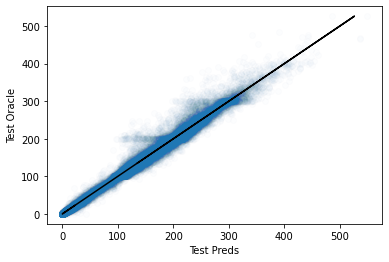

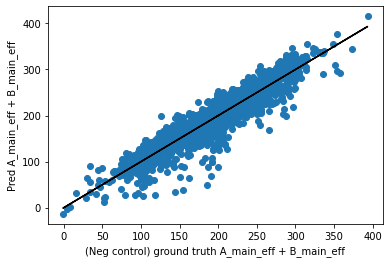

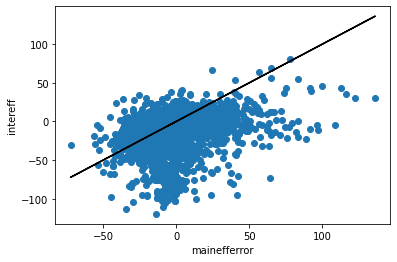

On model model_preds/negcontrol_model-arch3_l1reg-0.0001_seed300_xdpdl.h5
overall test loss 1.3828521589354263
model_preds/negcontrol_model-arch3_l1reg-0.0001_seed300_xdpdl.h5


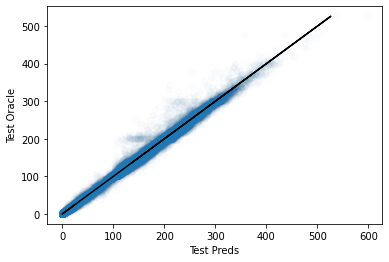

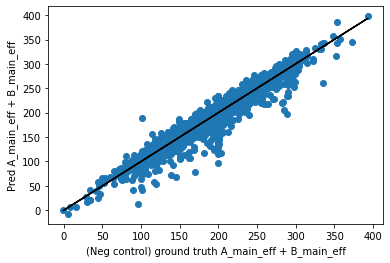

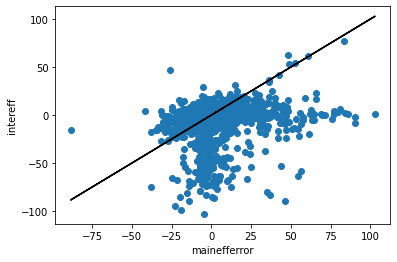

On model model_preds/negcontrol_model-arch3_l1reg-0.0001_seed100_texte.h5
overall test loss 1.5155973313261764
model_preds/negcontrol_model-arch3_l1reg-0.0001_seed100_texte.h5


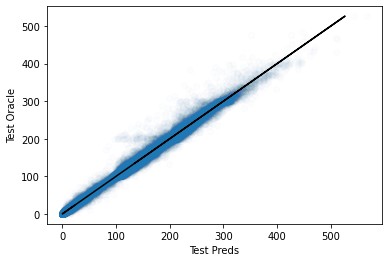

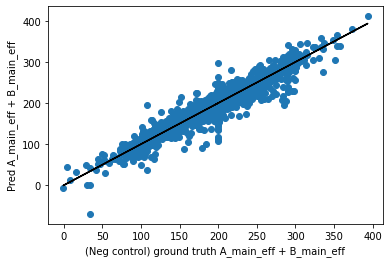

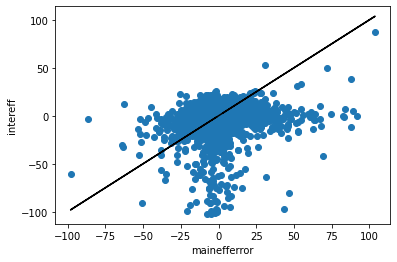

On model model_preds/negcontrol_model-arch2_l1reg-0.0001_seed500_bzjws.h5
overall test loss 1.5153418873698363
model_preds/negcontrol_model-arch2_l1reg-0.0001_seed500_bzjws.h5


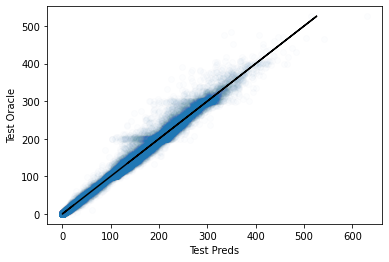

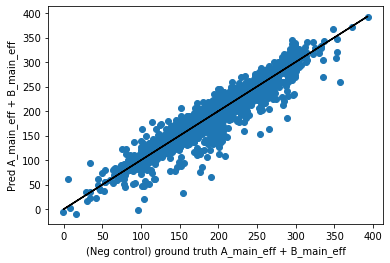

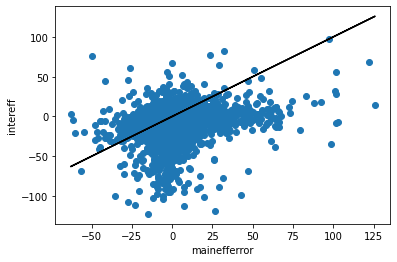

On model model_preds/negcontrol_model-arch3_l1reg-0.001_seed200_rfdfb.h5
overall test loss 1.4463774134059617
model_preds/negcontrol_model-arch3_l1reg-0.001_seed200_rfdfb.h5


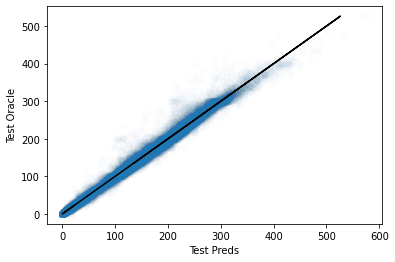

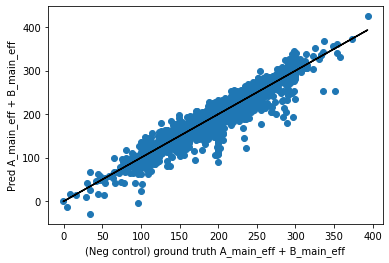

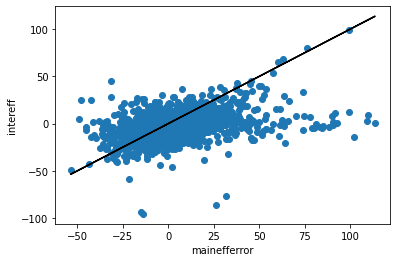

On model model_preds/negcontrol_model-arch1_l1reg-0.001_seed200_eftjz.h5
overall test loss 1.6485941441534364
model_preds/negcontrol_model-arch1_l1reg-0.001_seed200_eftjz.h5


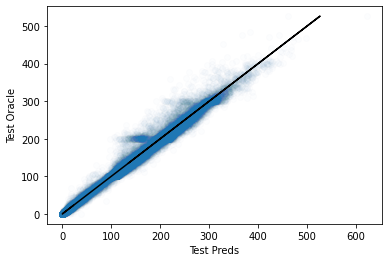

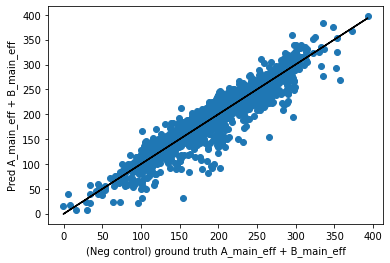

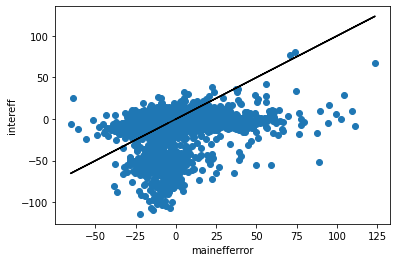

On model model_preds/negcontrol_model-arch1_l1reg-0.0_seed300_ewoyk.h5
overall test loss 1.4727002780221052
model_preds/negcontrol_model-arch1_l1reg-0.0_seed300_ewoyk.h5


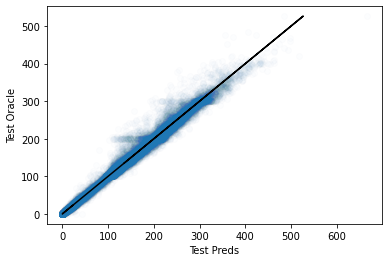

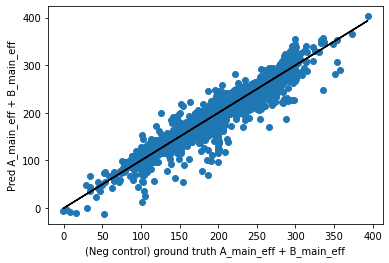

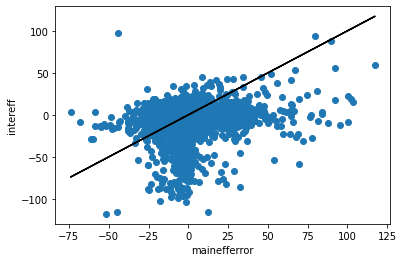

On model model_preds/negcontrol_model-arch1_l1reg-0.0_seed400_akswq.h5
overall test loss 1.5873017073154516
model_preds/negcontrol_model-arch1_l1reg-0.0_seed400_akswq.h5


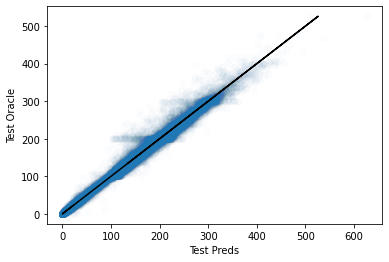

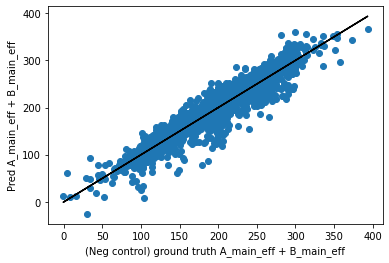

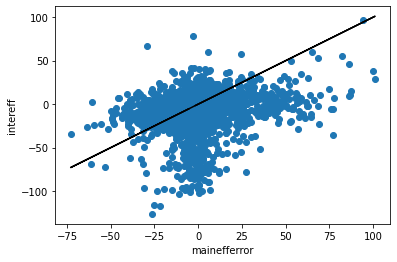

On model model_preds/negcontrol_model-arch1_l1reg-0.001_seed100_ltffs.h5
overall test loss 1.439615971283907
model_preds/negcontrol_model-arch1_l1reg-0.001_seed100_ltffs.h5


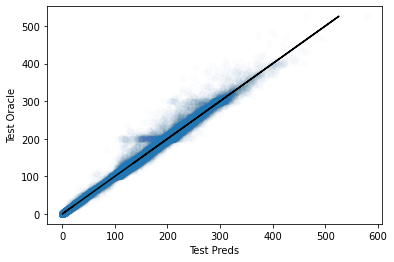

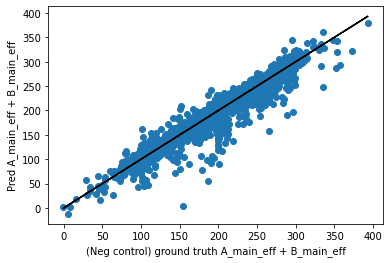

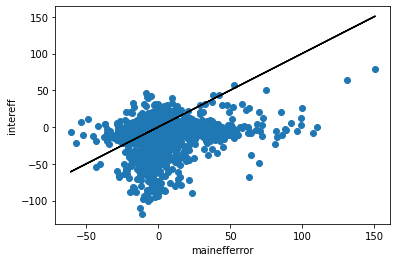

On model model_preds/negcontrol_model-arch2_l1reg-0.0_seed300_ypwis.h5
overall test loss 1.6076776494889873
model_preds/negcontrol_model-arch2_l1reg-0.0_seed300_ypwis.h5


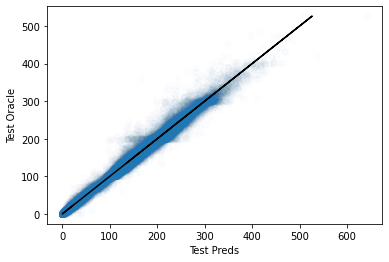

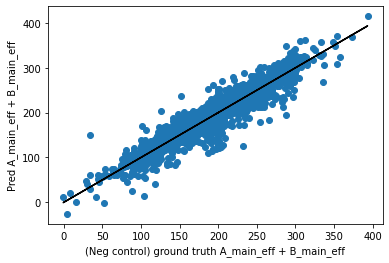

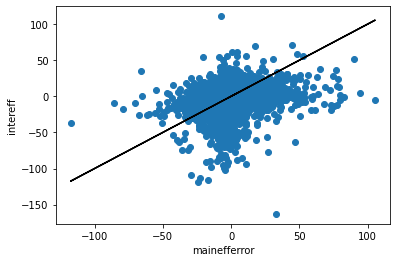

On model model_preds/negcontrol_model-arch3_l1reg-0.0_seed300_xqbvq.h5
overall test loss 1.5029387234200697
model_preds/negcontrol_model-arch3_l1reg-0.0_seed300_xqbvq.h5


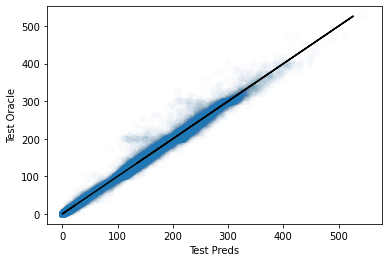

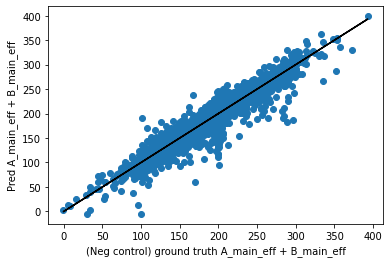

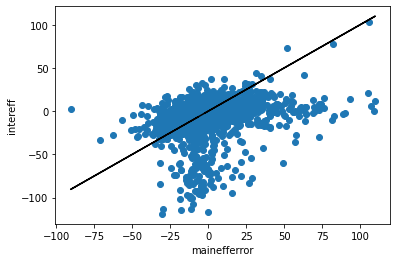

On model model_preds/negcontrol_model-arch2_l1reg-0.001_seed500_phdrn.h5
overall test loss 1.500133579302882
model_preds/negcontrol_model-arch2_l1reg-0.001_seed500_phdrn.h5


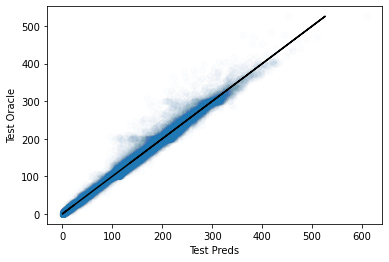

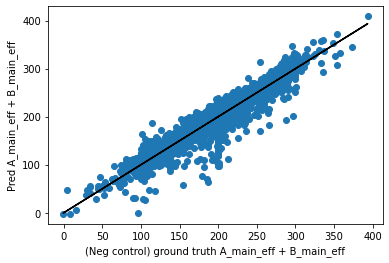

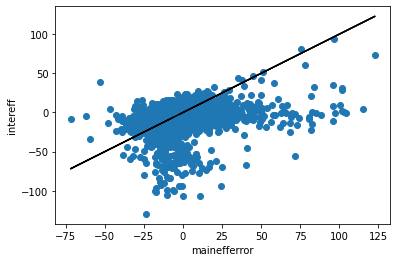

On model model_preds/negcontrol_model-arch2_l1reg-0.0001_seed200_uyqdg.h5
overall test loss 1.7071404617850914
model_preds/negcontrol_model-arch2_l1reg-0.0001_seed200_uyqdg.h5


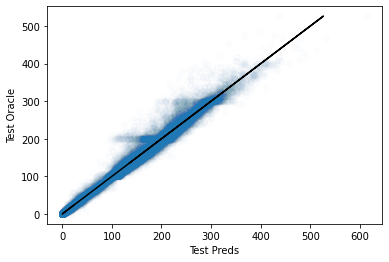

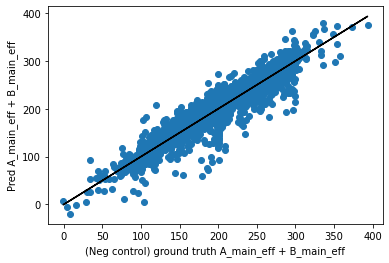

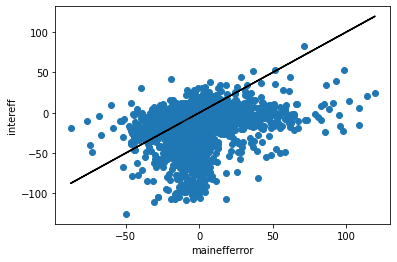

On model model_preds/negcontrol_model-arch2_l1reg-0.0001_seed400_iqqsg.h5
overall test loss 1.813682138814352
model_preds/negcontrol_model-arch2_l1reg-0.0001_seed400_iqqsg.h5


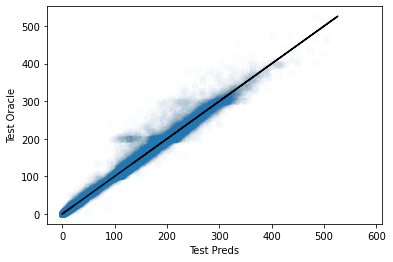

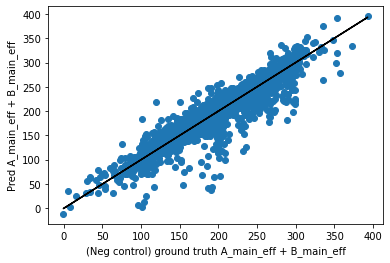

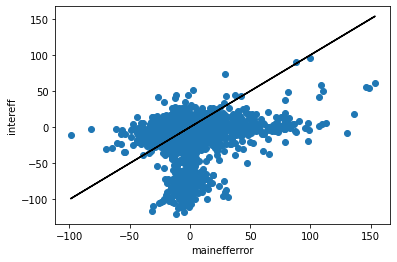

On model model_preds/negcontrol_model-arch2_l1reg-0.001_seed400_zphpl.h5
overall test loss 1.749124734404285
model_preds/negcontrol_model-arch2_l1reg-0.001_seed400_zphpl.h5


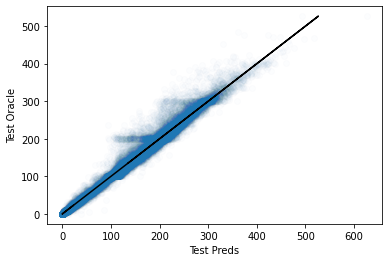

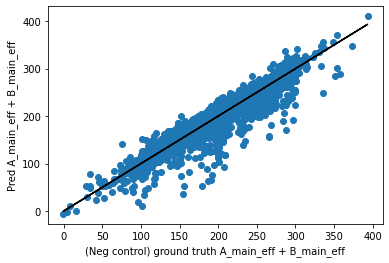

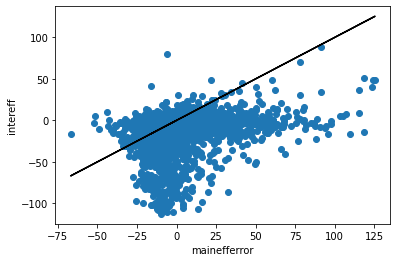

On model model_preds/negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5
overall test loss 1.8357224926209672
model_preds/negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5


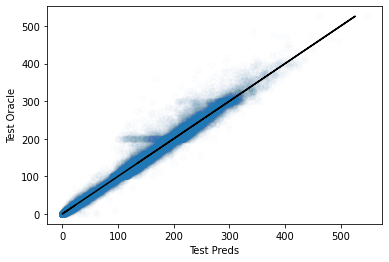

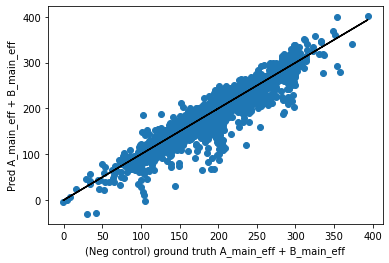

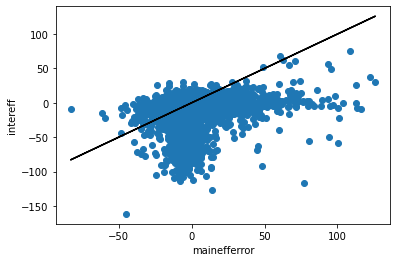

On model model_preds/negcontrol_model-arch3_l1reg-0.001_seed100_jubpn.h5
overall test loss 1.4639338782876523
model_preds/negcontrol_model-arch3_l1reg-0.001_seed100_jubpn.h5


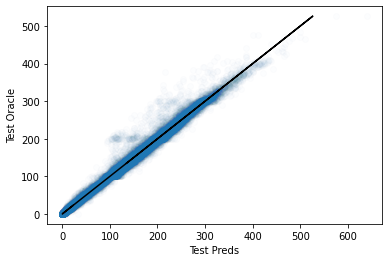

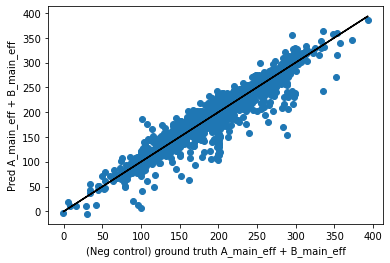

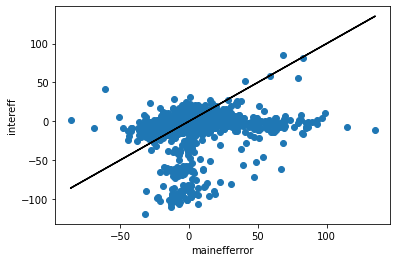

On model model_preds/negcontrol_model-arch3_l1reg-0.0_seed100_rmivg.h5
overall test loss 1.444277922880862
model_preds/negcontrol_model-arch3_l1reg-0.0_seed100_rmivg.h5


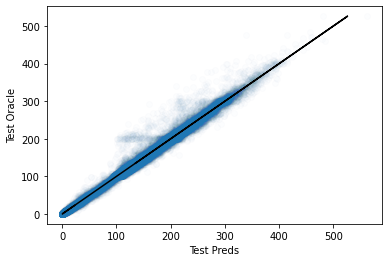

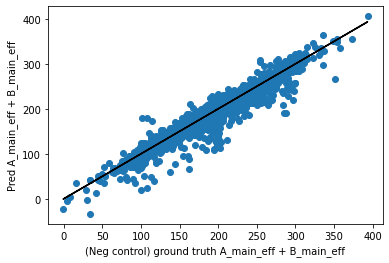

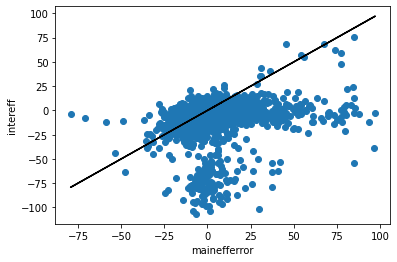

On model model_preds/negcontrol_model-arch2_l1reg-0.0_seed400_qefnh.h5
overall test loss 1.610322944137977
model_preds/negcontrol_model-arch2_l1reg-0.0_seed400_qefnh.h5


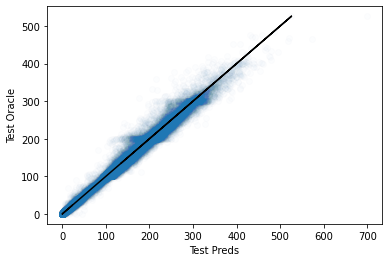

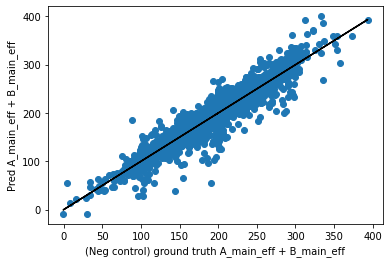

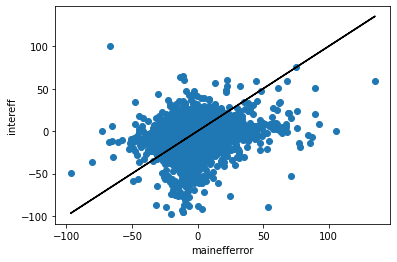

On model model_preds/negcontrol_model-arch3_l1reg-0.001_seed500_fvauo.h5
overall test loss 1.3394805528268108
model_preds/negcontrol_model-arch3_l1reg-0.001_seed500_fvauo.h5


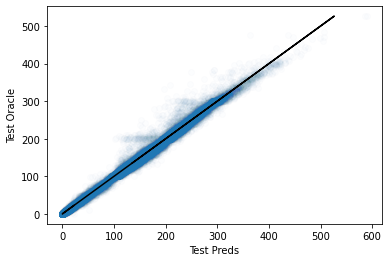

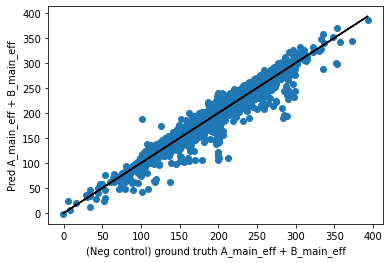

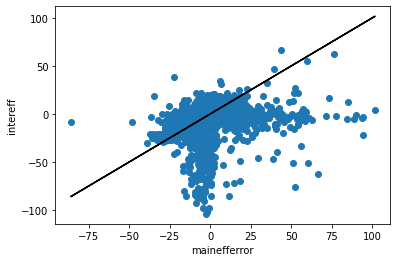

On model model_preds/negcontrol_model-arch3_l1reg-0.001_seed300_lwpgy.h5
overall test loss 1.346891612160636
model_preds/negcontrol_model-arch3_l1reg-0.001_seed300_lwpgy.h5


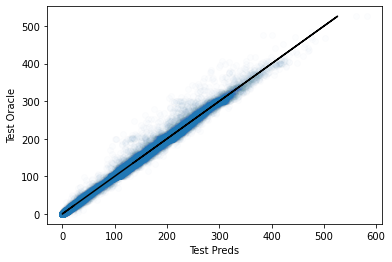

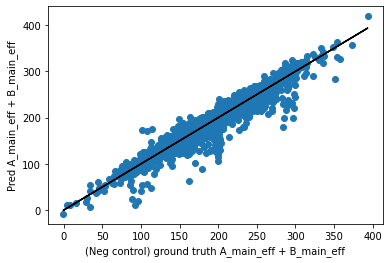

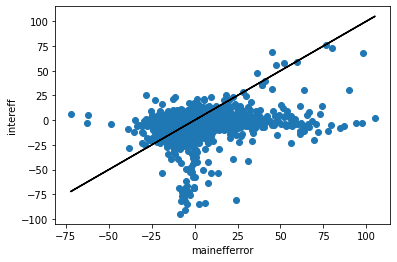

On model model_preds/negcontrol_model-arch3_l1reg-0.0001_seed200_kpyir.h5
overall test loss 1.5244731619175211
model_preds/negcontrol_model-arch3_l1reg-0.0001_seed200_kpyir.h5


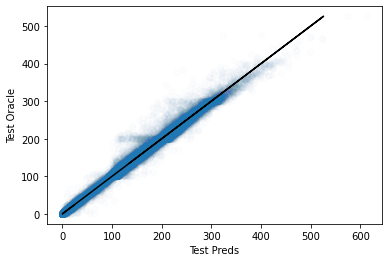

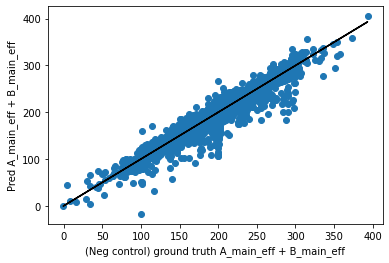

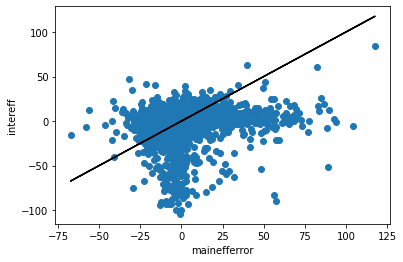

On model model_preds/negcontrol_model-arch2_l1reg-0.001_seed100_paesj.h5
overall test loss 1.4549979273802653
model_preds/negcontrol_model-arch2_l1reg-0.001_seed100_paesj.h5


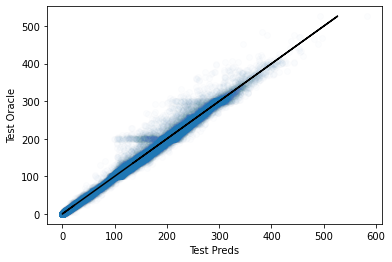

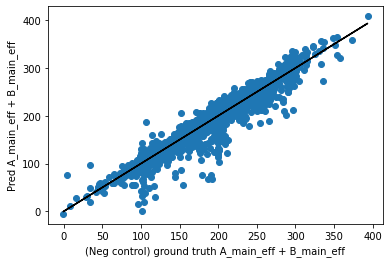

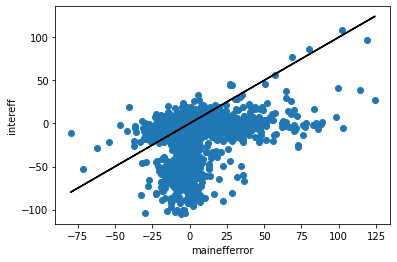

On model model_preds/negcontrol_model-arch1_l1reg-0.0001_seed300_byxjs.h5
overall test loss 1.8268524160989432
model_preds/negcontrol_model-arch1_l1reg-0.0001_seed300_byxjs.h5


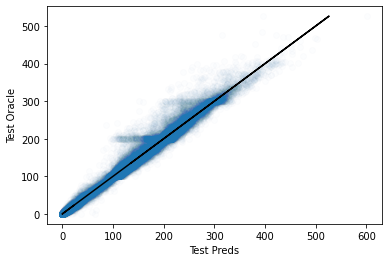

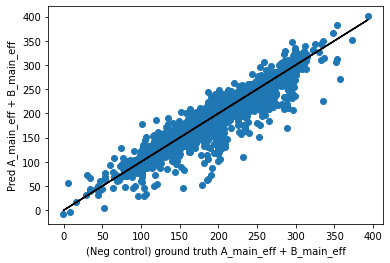

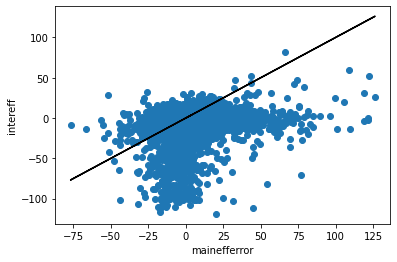

On model model_preds/negcontrol_model-arch1_l1reg-0.0001_seed200_astxj.h5
overall test loss 1.4182026215233647
model_preds/negcontrol_model-arch1_l1reg-0.0001_seed200_astxj.h5


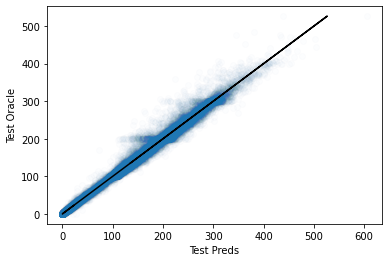

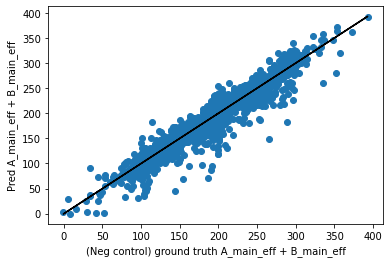

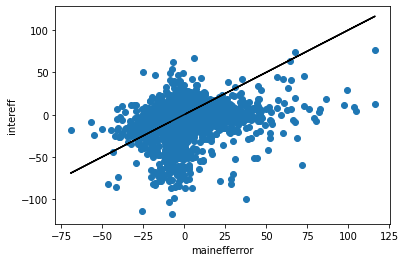

On model model_preds/negcontrol_model-arch2_l1reg-0.001_seed300_egqtg.h5
overall test loss 1.6047690636128236
model_preds/negcontrol_model-arch2_l1reg-0.001_seed300_egqtg.h5


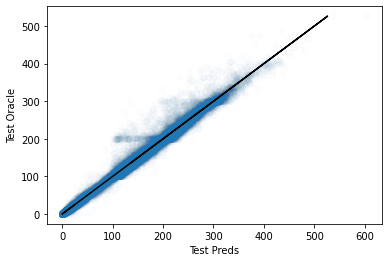

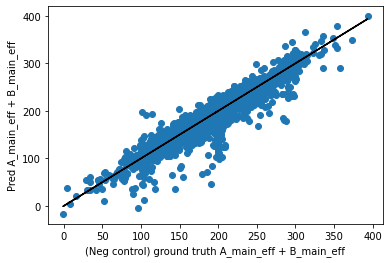

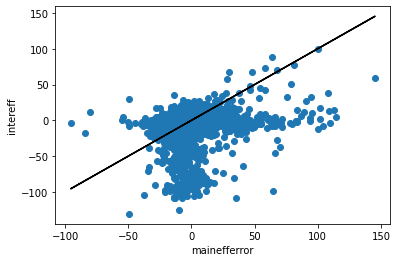

On model model_preds/negcontrol_model-arch2_l1reg-0.0001_seed300_pxmfv.h5
overall test loss 1.4998583899209297
model_preds/negcontrol_model-arch2_l1reg-0.0001_seed300_pxmfv.h5


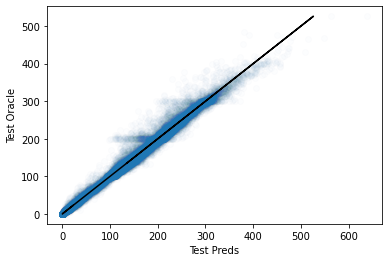

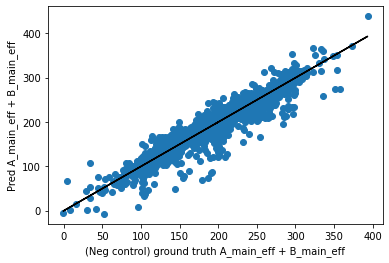

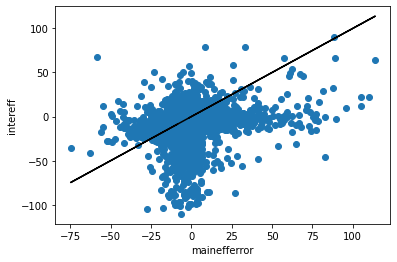

On model model_preds/negcontrol_model-arch2_l1reg-0.0_seed200_xytqa.h5
overall test loss 1.8151824156665928
model_preds/negcontrol_model-arch2_l1reg-0.0_seed200_xytqa.h5


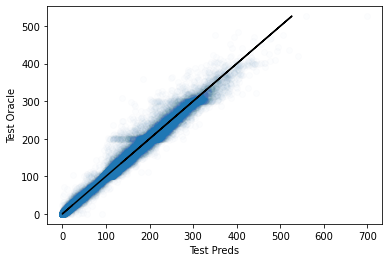

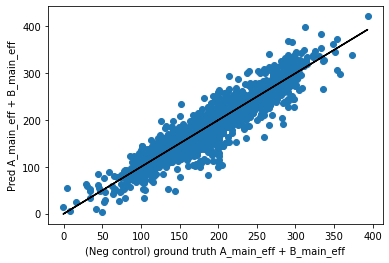

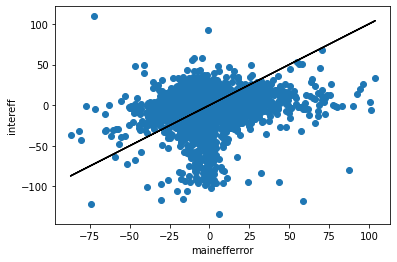

On model model_preds/negcontrol_model-arch2_l1reg-0.001_seed200_uatwa.h5
overall test loss 1.5974012480548732
model_preds/negcontrol_model-arch2_l1reg-0.001_seed200_uatwa.h5


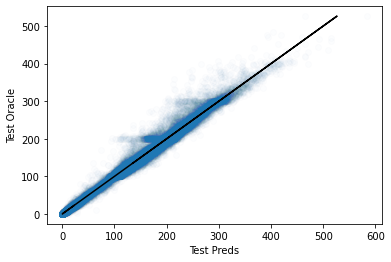

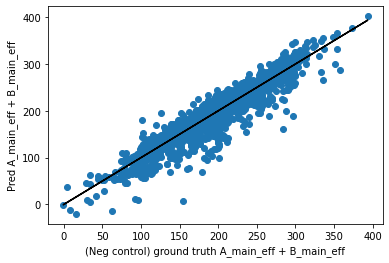

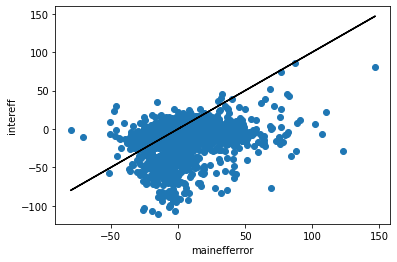

On model model_preds/negcontrol_model-arch3_l1reg-0.001_seed400_bpykc.h5
overall test loss 1.4084613025141395
model_preds/negcontrol_model-arch3_l1reg-0.001_seed400_bpykc.h5


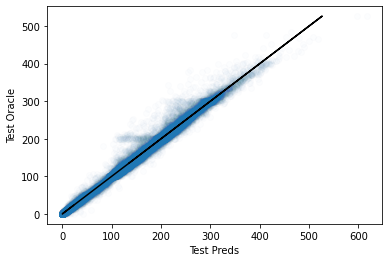

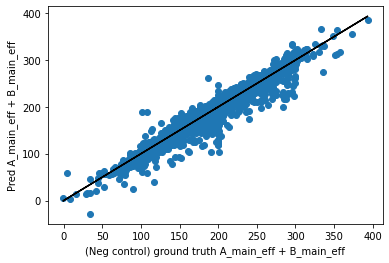

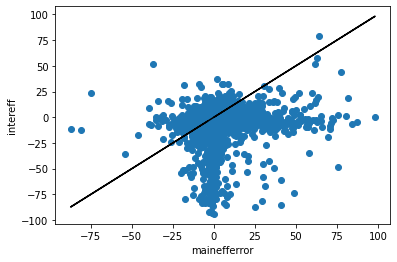

On model model_preds/negcontrol_model-arch1_l1reg-0.0001_seed500_owzhn.h5
overall test loss 1.6300539608980975
model_preds/negcontrol_model-arch1_l1reg-0.0001_seed500_owzhn.h5


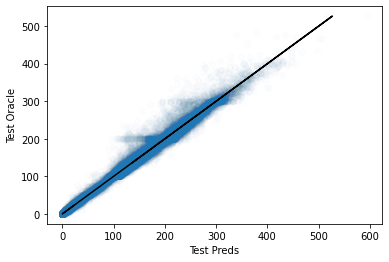

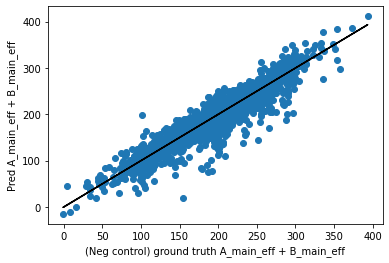

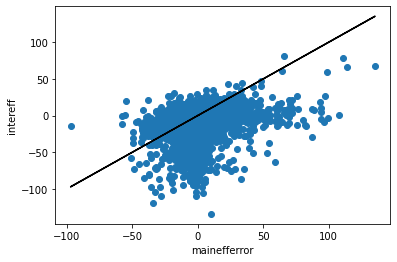

On model model_preds/negcontrol_model-arch1_l1reg-0.001_seed500_rccha.h5
overall test loss 1.413982410622318
model_preds/negcontrol_model-arch1_l1reg-0.001_seed500_rccha.h5


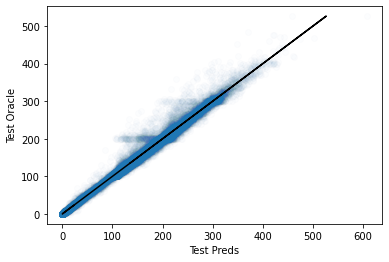

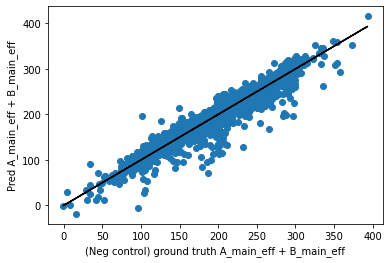

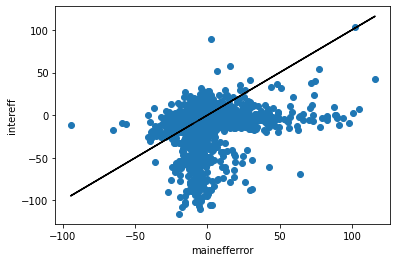

On model model_preds/negcontrol_model-arch1_l1reg-0.0_seed200_bhpew.h5
overall test loss 1.6919280740724
model_preds/negcontrol_model-arch1_l1reg-0.0_seed200_bhpew.h5


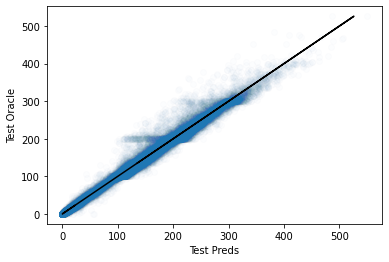

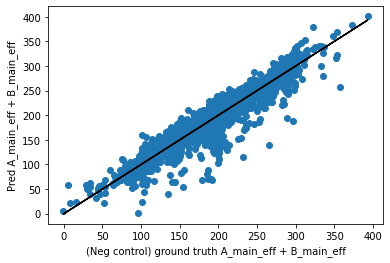

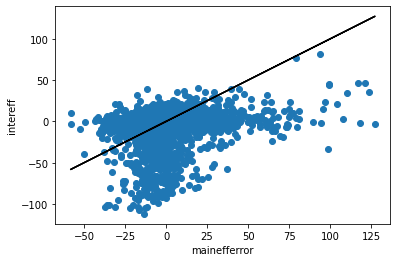

On model model_preds/negcontrol_model-arch3_l1reg-0.0_seed200_zfper.h5
overall test loss 1.5603225717978193
model_preds/negcontrol_model-arch3_l1reg-0.0_seed200_zfper.h5


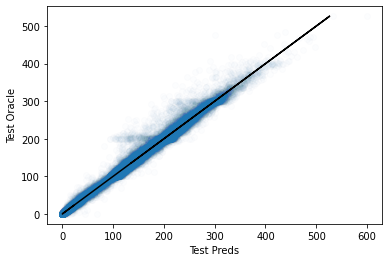

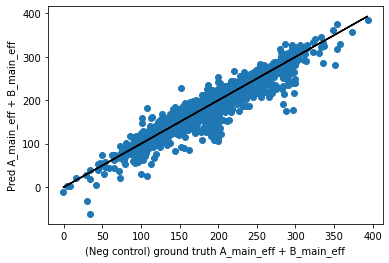

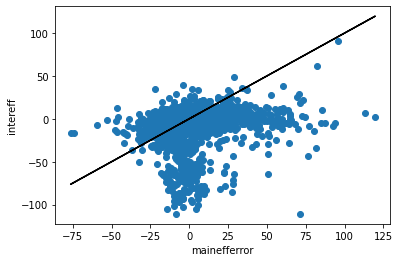

On model model_preds/poscontrol_model-arch3_l1reg-0.0_seed200_vkewt.h5
overall test loss 1.6474376615328459
On model model_preds/poscontrol_model-arch1_l1reg-0.001_seed200_tudtw.h5
overall test loss 1.393355297776935
On model model_preds/poscontrol_model-arch3_l1reg-0.0_seed400_lqltb.h5
overall test loss 1.4081524062348778
On model model_preds/poscontrol_model-arch3_l1reg-0.001_seed500_yyfcz.h5
overall test loss 1.3235342102900287
On model model_preds/poscontrol_model-arch3_l1reg-0.0001_seed300_jtgjz.h5
overall test loss 1.5466810291707316
On model model_preds/poscontrol_model-arch2_l1reg-0.001_seed300_ookbb.h5
overall test loss 1.5654439335672188
On model model_preds/poscontrol_model-arch1_l1reg-0.001_seed300_rrofa.h5
overall test loss 1.7510687756051042
On model model_preds/poscontrol_model-arch2_l1reg-0.0_seed300_hnyxy.h5
overall test loss 1.8231687540637238
On model model_preds/poscontrol_model-arch2_l1reg-0.001_seed500_iunnw.h5
overall test loss 2.076237787177565
On model model_pr

In [13]:
import keras
from keras.models import load_model
from collections import OrderedDict

def run_analysis_on_multiple_models(
    modelpredsfiles,
    all_test_labels, all_test_oracle,
    test_toanalyze_labels,
    train_toanalyze_labels,
    shuff_toanalyze_oraclepreds):
  results = OrderedDict()
  for modelpredsfile in modelpredsfiles:
    print("On model", modelpredsfile)
    lossfunc = anscombemse_loss
    valthresh = -3.0/8
    
    interaction_analysis = perform_interaction_analysis(
      modelpredsfile=modelpredsfile,
      all_test_labels=all_test_labels,
      all_test_oracle=all_test_oracle,
      test_toanalyze_labels=test_toanalyze_labels,
      train_toanalyze_labels=train_toanalyze_labels,
      shuff_toanalyze_oraclepreds=shuff_toanalyze_oraclepreds,
      lossfunc=lossfunc, valthresh=valthresh)
    results[modelpredsfile.split("/")[-1]] = interaction_analysis
  return results

negcontrol_results = run_analysis_on_multiple_models(
    modelpredsfiles=negcontrol_modelpredsfiles,
    all_test_labels=test_neg_labels,
    all_test_oracle=test_neg_oracle,
    test_toanalyze_labels=test_toanalyze_orig_neg_labels,
    train_toanalyze_labels=train_toanalyze_orig_neg_labels,
    shuff_toanalyze_oraclepreds=shuff_toanalyze_orig_oraclepred_neg
    )

poscontrol_results = run_analysis_on_multiple_models(
    modelpredsfiles=poscontrol_modelpredsfiles,
    all_test_labels=test_pos_labels,
    all_test_oracle=test_pos_oracle,
    test_toanalyze_labels=test_toanalyze_orig_pos_labels,
    train_toanalyze_labels=train_toanalyze_orig_neg_labels,
    shuff_toanalyze_oraclepreds=shuff_toanalyze_orig_oraclepred_pos)

In [14]:
failed_paired_wilcoxon_negcontrol = [x for x in negcontrol_results.keys() if
                                     negcontrol_results[x].test_toanalyze_lossimprovement_wilcoxon.pvalue < 0.05]
print("\n".join(sorted(str(x) for x in failed_paired_wilcoxon_negcontrol)))
print(len(failed_paired_wilcoxon_negcontrol))

negcontrol_model-arch3_l1reg-0.001_seed200_rfdfb.h5
1


In [15]:
failed_mannwhit_negcontrol = [(x,negcontrol_results[x].test_toanalyze_lossimprovement_mannwhit.pvalue)
                              for x in negcontrol_results.keys() if
                              negcontrol_results[x].test_toanalyze_lossimprovement_mannwhit.pvalue < 0.05]
print("\n".join(sorted(str(x) for x in failed_mannwhit_negcontrol)))
print(len(failed_mannwhit_negcontrol))


0


In [114]:
import scipy.stats

#need scatterplot of predicted main eff and predicted inter eff on
# negative control data

negcontrol_main_eff_vec = []
negcontrol_main_eff_error_vec = []
negcontrol_inter_eff_vec = []

negcontrol_test_intereff_mag_mean = []
negcontrol_test_intereff_mag_stderr = []
negcontrol_shuff_intereff_mag_mean = []
negcontrol_shuff_intereff_mag_stderr = []

poscontrol_test_intereff_mag_mean = []
poscontrol_test_intereff_mag_stderr = []
poscontrol_shuff_intereff_mag_mean = []
poscontrol_shuff_intereff_mag_stderr = []

negcontrol_test_lossimp_mean = []
negcontrol_test_lossimp_median = []
negcontrol_test_lossimp_stderr = []
negcontrol_controltest_lossimp_mean = []
negcontrol_controltest_lossimp_median = []
negcontrol_controltest_lossimp_stderr = []

negcontrol_train_lossimp_mean = []
negcontrol_train_lossimp_median = []
negcontrol_train_lossimp_stderr = []
negcontrol_controltrain_lossimp_mean = []
negcontrol_controltrain_lossimp_median = []
negcontrol_controltrain_lossimp_stderr = []

poscontrol_test_lossimp_mean = []
poscontrol_test_lossimp_median = []
poscontrol_test_lossimp_stderr = []
poscontrol_controltest_lossimp_mean = []
poscontrol_controltest_lossimp_median = []
poscontrol_controltest_lossimp_stderr = []

negcontrol_mainvintereff_corrs = []

negcontrol_modelorder = []
poscontrol_modelorder = []

for (isposcontrol, results) in [(True, poscontrol_results),
                                (False, negcontrol_results)]:
  for modelfile, single_model_result in results.items():
    if (isposcontrol):
      poscontrol_modelorder.append(modelfile)
    else:
      negcontrol_modelorder.append(modelfile)

    test_main_effs = (
    single_model_result.test_toanalyze_interactioneffectdata.A_main_eff
    + single_model_result.test_toanalyze_interactioneffectdata.B_main_eff)

    test_intereff = (
        single_model_result.test_toanalyze_interactioneffectdata.inter_eff)
    shuff_intereff = (
        single_model_result.shuff_toanalyze_interactioneffectdata.inter_eff)
    
    mag_test_intereff = np.abs(test_intereff)
    mag_shuff_intereff = np.abs(shuff_intereff)

    if (isposcontrol==False):
      negcontrol_test_intereff_mag_mean.append(np.mean(mag_test_intereff))
      negcontrol_shuff_intereff_mag_mean.append(np.mean(mag_shuff_intereff))
      negcontrol_test_intereff_mag_stderr.append(scipy.stats.sem(mag_test_intereff))
      negcontrol_shuff_intereff_mag_stderr.append(scipy.stats.sem(mag_shuff_intereff))
    else:
      poscontrol_test_intereff_mag_mean.append(np.mean(mag_test_intereff))
      poscontrol_shuff_intereff_mag_mean.append(np.mean(mag_shuff_intereff))
      poscontrol_test_intereff_mag_stderr.append(scipy.stats.sem(mag_test_intereff))
      poscontrol_shuff_intereff_mag_stderr.append(scipy.stats.sem(mag_shuff_intereff))
      
    test_main_eff_error = test_toanalyze_groundtruth_neg_maineff - test_main_effs
    
    if (isposcontrol==False):
      negcontrol_main_eff_vec.extend(test_main_effs)
      negcontrol_main_eff_error_vec.extend(test_main_eff_error)
      negcontrol_inter_eff_vec.extend(test_intereff)
      negcontrol_mainvintereff_corrs.append(
          scipy.stats.spearmanr(test_main_effs, test_intereff)[0])

    if (isposcontrol==False):
      negcontrol_test_lossimp_mean.append(np.mean(
        single_model_result.test_toanalyze_lossimprovement))
      negcontrol_test_lossimp_median.append(np.median(
          single_model_result.test_toanalyze_lossimprovement))
      negcontrol_test_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.test_toanalyze_lossimprovement))

      negcontrol_train_lossimp_mean.append(np.mean(
        single_model_result.train_toanalyze_lossimprovement))      
      negcontrol_train_lossimp_median.append(np.median(
          single_model_result.train_toanalyze_lossimprovement))  
      negcontrol_train_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.train_toanalyze_lossimprovement))

      negcontrol_controltest_lossimp_mean.append(np.mean(
        single_model_result.controltest_toanalyze_lossimprovement))
      negcontrol_controltest_lossimp_median.append(np.median(
        single_model_result.controltest_toanalyze_lossimprovement))
      negcontrol_controltest_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.controltest_toanalyze_lossimprovement))
      
      negcontrol_controltrain_lossimp_mean.append(np.mean(
        single_model_result.controltrain_toanalyze_lossimprovement))
      negcontrol_controltrain_lossimp_median.append(np.median(
        single_model_result.controltrain_toanalyze_lossimprovement))
      negcontrol_controltrain_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.controltrain_toanalyze_lossimprovement))

    else:
      poscontrol_test_lossimp_mean.append(np.mean(
        single_model_result.test_toanalyze_lossimprovement))
      poscontrol_test_lossimp_median.append(np.median(
          single_model_result.test_toanalyze_lossimprovement))
      poscontrol_test_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.test_toanalyze_lossimprovement))  
      
      poscontrol_controltest_lossimp_mean.append(np.mean(
        single_model_result.controltest_toanalyze_lossimprovement))
      poscontrol_controltest_lossimp_median.append(np.median(
        single_model_result.controltest_toanalyze_lossimprovement))
      poscontrol_controltest_lossimp_stderr.append(scipy.stats.sem(
        single_model_result.controltest_toanalyze_lossimprovement))

In [115]:
def xyaxis_scatterplot(x,y, highlight=[], highlight_color='red', density=False,
                       withxeqy=True, squareplot=False, **kwargs):
  
  if ('xerr' in kwargs or 'yerr' in kwargs):
    plt.errorbar(x,y,**kwargs)
  else:
    if (density==False):
      plt.scatter(x,y,**kwargs)
    else:
      # Calculate the point density
      xy = np.vstack([x,y])
      from scipy.stats import gaussian_kde
      z = gaussian_kde(xy)(xy)
      plt.scatter(x,y,c=z, edgecolor='', **kwargs)
  if ('xerr' in kwargs or 'yerr' in kwargs):
    plt.errorbar([x[i] for i in highlight],
                 [y[i] for i in highlight],
                 fmt=kwargs['fmt'],
                 xerr=[kwargs['xerr'][i] if 'xerr' in kwargs else 0
                       for i in highlight],
                 yerr=[kwargs['yerr'][i] for i in highlight],
                 color=highlight_color)
  else:
    plt.scatter([x[i] for i in highlight],
                [y[i] for i in highlight], color=highlight_color)
  
  xlim = plt.gca().get_xlim()
  ylim = plt.gca().get_ylim() 
  xlim = [min(xlim[0],0),max(xlim[1],0)]
  ylim = [min(ylim[0],0),max(ylim[1],0)]
  if (squareplot):
    xlim = [min(xlim[0],ylim[0]), max(xlim[1], ylim[1])]
    ylim = list(xlim)
  if (withxeqy):
    plt.plot(xlim, [0,0], color="black", linestyle="--")
    plt.plot([0,0], ylim, color="black", linestyle="--")
    plt.plot(xlim, xlim, color="black", linestyle=":")
  else:
    #axes
    plt.plot(xlim, [0,0], color="black", linestyle="--")
    plt.plot([0,0], ylim, color="black", linestyle="--")
  plt.xlim(xlim)
  plt.ylim(ylim)

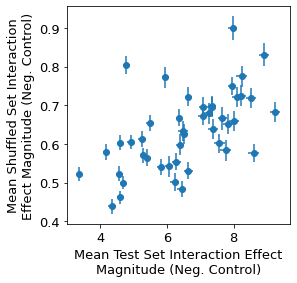

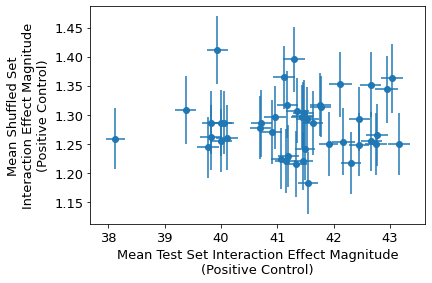

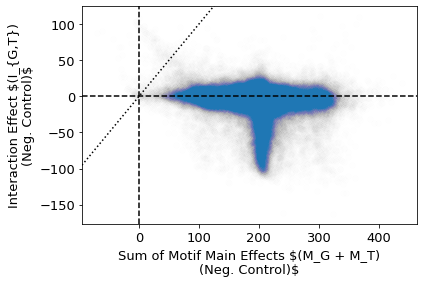

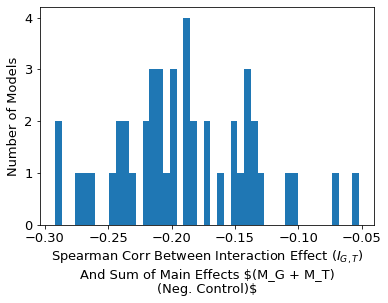

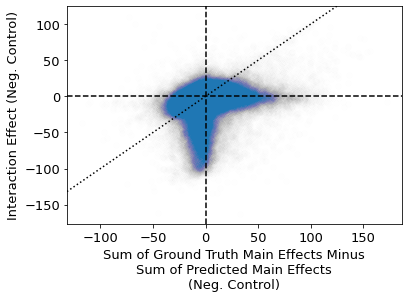

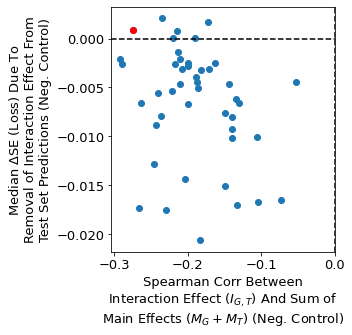

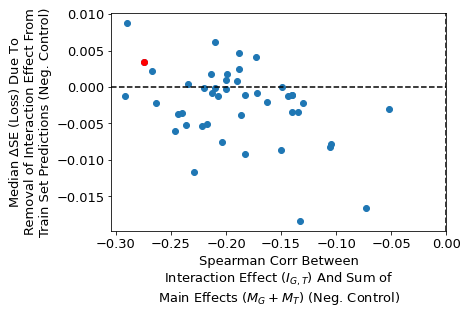

In [139]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rc('font', size=13)

#plt.plot(test_intereff_mag_mean, test_intereff_mag_mean, color="black")
plt.figure(figsize=(4,4))
plt.errorbar(x=negcontrol_test_intereff_mag_mean,
             y=negcontrol_shuff_intereff_mag_mean,
             xerr=negcontrol_test_intereff_mag_stderr,
             yerr=negcontrol_shuff_intereff_mag_stderr,
             fmt='o')
plt.xlabel("Mean Test Set Interaction Effect\nMagnitude (Neg. Control)")
plt.ylabel("Mean Shuffled Set Interaction\nEffect Magnitude (Neg. Control)")
plt.show()

plt.errorbar(x=poscontrol_test_intereff_mag_mean,
             y=poscontrol_shuff_intereff_mag_mean,
             xerr=poscontrol_test_intereff_mag_stderr,
             yerr=poscontrol_shuff_intereff_mag_stderr,
             fmt='o')
plt.xlabel("Mean Test Set Interaction Effect Magnitude\n(Positive Control)")
plt.ylabel("Mean Shuffled Set\nInteraction Effect Magnitude\n(Positive Control)")
plt.show()

xyaxis_scatterplot(negcontrol_main_eff_vec,
                   negcontrol_inter_eff_vec, density=False, alpha=0.003)
plt.xlabel(r"Sum of Motif Main Effects $(M_G + M_T)"+"\n(Neg. Control)$")
plt.ylabel(r"Interaction Effect $(I_{G,T})"+"\n(Neg. Control)$")
plt.show()

plt.hist(negcontrol_mainvintereff_corrs, bins=45)
plt.xlabel(r"Spearman Corr Between Interaction Effect $(I_{G,T})$"
            +"\n"+r"And Sum of Main Effects $(M_G + M_T)"+"\n(Neg. Control)$")
plt.ylabel("Number of Models")
plt.show()

xyaxis_scatterplot(negcontrol_main_eff_error_vec,
                   negcontrol_inter_eff_vec, density=False, alpha=0.003)
plt.xlabel("Sum of Ground Truth Main Effects Minus"
           +"\nSum of Predicted Main Effects\n(Neg. Control)")
plt.ylabel("Interaction Effect (Neg. Control)")
plt.show()

plt.figure(figsize=(4,4.5))
xyaxis_scatterplot(negcontrol_mainvintereff_corrs,
                   negcontrol_test_lossimp_median,
                   #yerr=negcontrol_test_lossimp_stderr,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol],
                   #fmt='o',
                   withxeqy=False
                   )
plt.xlabel(r"Spearman Corr Between"+"\n"+"Interaction Effect $(I_{G,T})$"
           +r" And Sum of"+"\n"+"Main Effects $(M_G + M_T)$ (Neg. Control)")
plt.ylabel(r"Median $\Delta$SE (Loss) Due To "+"\n"+
           "Removal of Interaction Effect From\nTest Set Predictions (Neg. Control)")
plt.show()

xyaxis_scatterplot(negcontrol_mainvintereff_corrs,
                   negcontrol_train_lossimp_median,
                   highlight=[negcontrol_modelorder.index(x)
                              for x in failed_paired_wilcoxon_negcontrol],
                   withxeqy=False)
plt.xlabel(r"Spearman Corr Between"+"\n"+"Interaction Effect $(I_{G,T})$"
           +r" And Sum of"+"\n"+"Main Effects $(M_G + M_T)$ (Neg. Control)")
plt.ylabel(r"Median $\Delta$SE (Loss) Due To "+"\n"+
           "Removal of Interaction Effect From\nTrain Set Predictions (Neg. Control)")
plt.show()

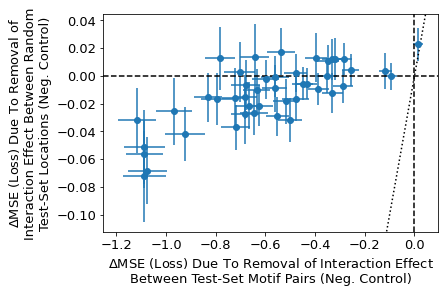

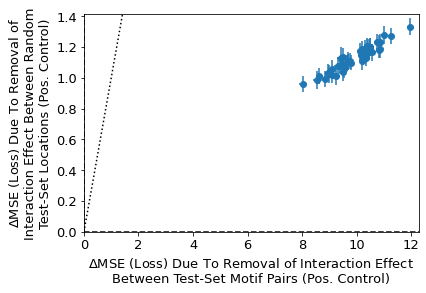

In [106]:
#MEDIAN_MULTIPLIER = 1.353

failed_paired_mannwhit_empiricalnull = [
  x for x in negcontrol_results.keys() if
  negcontrol_results[x].test_v_controltest_lossimp_mannwhit.pvalue < 0.05]

for tohighlight in [failed_paired_mannwhit_empiricalnull, 
                    #failed_paired_wilcoxon_negcontrol
                    ]:
  xyaxis_scatterplot(x=negcontrol_test_lossimp_mean,
                    y=negcontrol_controltest_lossimp_mean,
                    highlight=[negcontrol_modelorder.index(x)
                                for x in tohighlight
                                ],
                    xerr=negcontrol_test_lossimp_stderr,
                    yerr=negcontrol_controltest_lossimp_stderr,
                    fmt='o',
                    withxeqy=True,
                    )
  plt.xlabel(r"$\Delta$MSE (Loss) Due To Removal of Interaction Effect"+"\n"+"Between Test-Set Motif Pairs (Neg. Control)")
  plt.ylabel(r"$\Delta$MSE (Loss) Due To Removal of"+"\n"+"Interaction Effect Between Random"+"\n"+"Test-Set Locations (Neg. Control)")
  plt.show()

xyaxis_scatterplot(x=poscontrol_test_lossimp_mean,
                   y=poscontrol_controltest_lossimp_mean,
                   xerr=poscontrol_test_lossimp_stderr,
                   yerr=poscontrol_controltest_lossimp_stderr,
                   fmt='o'
                   )
plt.xlabel(r"$\Delta$MSE (Loss) Due To Removal of Interaction Effect"+"\n"+"Between Test-Set Motif Pairs (Pos. Control)")
plt.ylabel(r"$\Delta$MSE (Loss) Due To Removal of"+"\n"+"Interaction Effect Between Random"+"\n"+"Test-Set Locations (Pos. Control)")
plt.show()

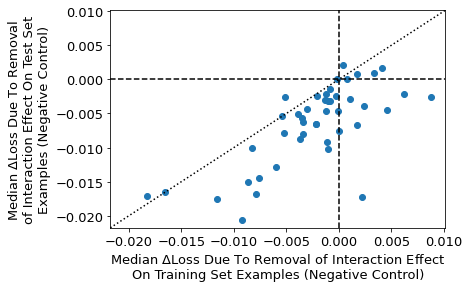

In [107]:
xyaxis_scatterplot(negcontrol_train_lossimp_median,
                   negcontrol_test_lossimp_median,
                   highlight = [],
                   #highlight=[negcontrol_modelorder.index(x)
                   #           for x in failed_paired_wilcoxon_negcontrol],
                   withxeqy=True,
                   squareplot=True)
plt.ylabel("Median $\Delta$Loss Due To Removal"+"\n"
           +"of Interaction Effect On Test Set\nExamples (Negative Control)")
plt.xlabel("Median $\Delta$Loss Due To "
           +"Removal of Interaction Effect\nOn Training Set Examples (Negative Control)")
plt.show()

Incorporating negcontrol_model-arch3_l1reg-0.001_seed200_rfdfb.h5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


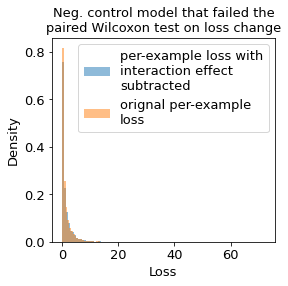

Median paired difference: 0.0009189171605581638
Paired p value WilcoxonResult(statistic=16356745.0, pvalue=0.011004017582385221)
Unpaired p value MannwhitneyuResult(statistic=31888903.5, pvalue=0.3391868042981608)


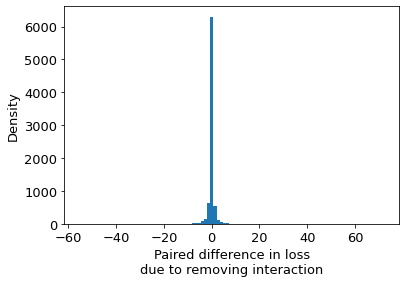

Incorporating poscontrol_model-arch3_l1reg-0.0_seed200_vkewt.h5
Incorporating poscontrol_model-arch1_l1reg-0.001_seed200_tudtw.h5
Incorporating poscontrol_model-arch3_l1reg-0.0_seed400_lqltb.h5
Incorporating poscontrol_model-arch3_l1reg-0.001_seed500_yyfcz.h5
Incorporating poscontrol_model-arch3_l1reg-0.0001_seed300_jtgjz.h5
Incorporating poscontrol_model-arch2_l1reg-0.001_seed300_ookbb.h5
Incorporating poscontrol_model-arch1_l1reg-0.001_seed300_rrofa.h5
Incorporating poscontrol_model-arch2_l1reg-0.0_seed300_hnyxy.h5
Incorporating poscontrol_model-arch2_l1reg-0.001_seed500_iunnw.h5
Incorporating poscontrol_model-arch3_l1reg-0.0001_seed500_lkead.h5
Incorporating poscontrol_model-arch2_l1reg-0.001_seed400_rpblq.h5
Incorporating poscontrol_model-arch1_l1reg-0.0001_seed300_dhxwt.h5
Incorporating poscontrol_model-arch1_l1reg-0.001_seed500_vdeve.h5
Incorporating poscontrol_model-arch1_l1reg-0.0_seed400_qsgmu.h5
Incorporating poscontrol_model-arch2_l1reg-0.0_seed400_ewzvv.h5
Incorporating pos

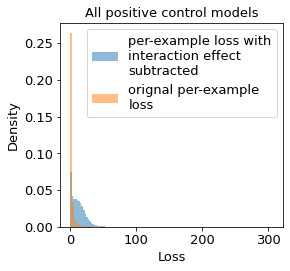

Median paired difference: 9.247916242026916
Paired p value WilcoxonResult(statistic=59538870099.0, pvalue=0.0)
Unpaired p value MannwhitneyuResult(statistic=110537799656.0, pvalue=0.0)


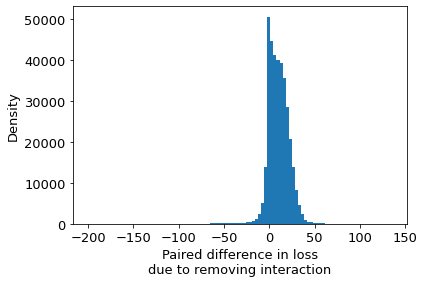

In [68]:

def render_loss_histograms(results, title):
  origpred_losses = []
  maineff_losses = []
  for modeltoplot in [x for x in results if
              results[x].test_toanalyze_lossimprovement_wilcoxon.pvalue < 0.05]:
    print("Incorporating",modeltoplot)
    single_model_result = results[modeltoplot]
    test_toanalyze_maineffpreds_loss=single_model_result.test_toanalyze_maineffpreds_loss
    test_toanalyze_origpreds_loss=single_model_result.test_toanalyze_origpreds_loss
    difference = test_toanalyze_maineffpreds_loss-test_toanalyze_origpreds_loss
    
    origpred_losses.extend(test_toanalyze_origpreds_loss)
    maineff_losses.extend(test_toanalyze_maineffpreds_loss)
    
    """plt.hist(test_toanalyze_maineffpreds_loss, alpha=0.5, density=True, bins=100)
    plt.hist(test_toanalyze_origpreds_loss, alpha=0.5, density=True, bins=100)
    plt.show()
    print(np.median(difference))
    plt.hist(difference, density=True, bins=100)
    plt.show()"""
    
  plt.figure(figsize=(4,3.75))
  handles = []
  handles.append(plt.hist(maineff_losses, alpha=0.5, density=True, bins=100))
  handles.append(plt.hist(origpred_losses, alpha=0.5, density=True, bins=100))
  plt.legend(handles, labels=["per-example loss with\ninteraction effect\nsubtracted", "orignal per-example\nloss"])
  plt.xlabel("Loss")
  plt.ylabel("Density")
  plt.title(title, size=13)
  plt.show()
  difference = np.array(maineff_losses)-np.array(origpred_losses)
  print("Median paired difference:", np.median(difference))
  print("Paired p value", scipy.stats.wilcoxon(x=difference,
                                              alternative="greater"))
  print("Unpaired p value", scipy.stats.mannwhitneyu(
                              x=maineff_losses, y=origpred_losses,
                              alternative="greater"))
  plt.hist(difference, bins=100)
  plt.xlabel("Paired difference in loss\ndue to removing interaction")
  plt.ylabel("Density")
  plt.show()

plt.rc('font', size=13)
render_loss_histograms(negcontrol_results, "Neg. control model that failed the\npaired Wilcoxon test on loss change")
render_loss_histograms(poscontrol_results, "All positive control models")

negcontrol_model-arch3_l1reg-0.001_seed200_rfdfb.h5


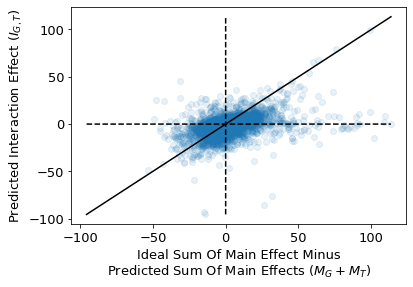

In [22]:
for modeltoplot in failed_paired_wilcoxon_negcontrol:
  print(modeltoplot)
  single_model_result = negcontrol_results[modeltoplot]
  test_main_effs = (
    single_model_result.test_toanalyze_interactioneffectdata.A_main_eff
    + single_model_result.test_toanalyze_interactioneffectdata.B_main_eff)

  test_main_eff_error = test_toanalyze_groundtruth_neg_maineff - test_main_effs

  test_intereff = (
        single_model_result.test_toanalyze_interactioneffectdata.inter_eff)

  xyaxis_scatterplot(test_main_eff_error, test_intereff, withxeqy=True, alpha=0.1)
  plt.xlabel("Ideal Sum Of Main Effect Minus\nPredicted Sum Of Main Effects ($M_{G} + M_{T}$)")
  plt.ylabel("Predicted Interaction Effect ($I_{G,T}$)")
  plt.show()

8.066390157027442
SpearmanrResult(correlation=0.7820816864295125, pvalue=2.2477772985491202e-10)


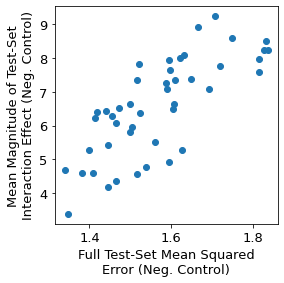

-0.7177421478907563
SpearmanrResult(correlation=-0.18682476943346504, pvalue=0.21912961785384133)


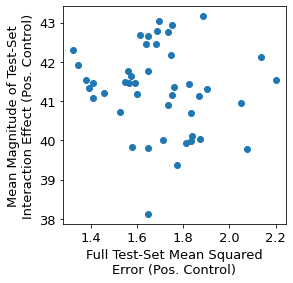

In [41]:
import scipy.stats

def plot_mse_v_intererr(results, description):
  xaxis = np.array([np.mean(results[modelname].overall_test_loss)
              for modelname in results.keys()])
  yaxis = np.array([np.mean(np.abs(results[modelname]
           .test_toanalyze_interactioneffectdata.inter_eff))
           for modelname in results])
  m, b = np.polyfit(xaxis, yaxis, 1)
  print(m)
  plt.figure(figsize=(4,4))
  plt.scatter(xaxis, yaxis)
  #plt.plot(xaxis, m*xaxis + b, color="black")
  plt.xlabel("Full Test-Set Mean Squared\nError ("+description+")")
  plt.ylabel("Mean Magnitude of Test-Set\nInteraction Effect ("
             +description+")")
  spearman = scipy.stats.spearmanr(xaxis, yaxis)
  print(spearman)
  #plt.title("spearman corr: "
  #          +str(np.round(spearman.correlation,5))+
  #          ", p-value "+str(np.round(spearman.pvalue,5)
  #          ))
  plt.show()
  

plot_mse_v_intererr(results=negcontrol_results,
                    description="Neg. Control")
plot_mse_v_intererr(results=poscontrol_results,
                    description="Pos. Control")

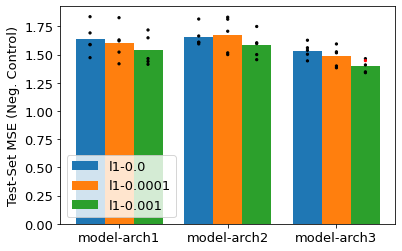

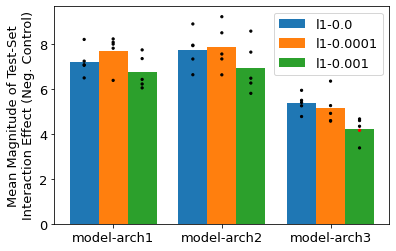

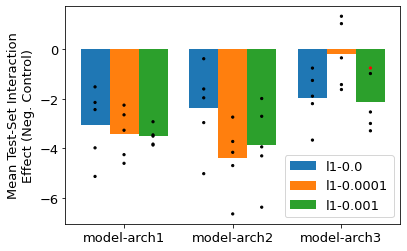

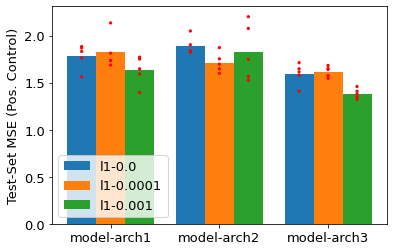

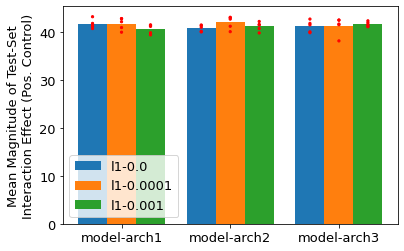

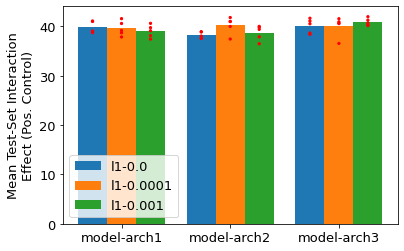

In [137]:
from collections import OrderedDict
from matplotlib import pyplot as plt

def barplot_performance(results, getattrib):

  tohighlight = set([x for x in results.keys() if
      results[x].test_toanalyze_lossimprovement_wilcoxon.pvalue < 0.05])

  arch_to_l1_to_perfs = OrderedDict()
  arch_to_l1_to_names = OrderedDict()
  for modelname in sorted(results.keys()):
    #print(modelname)
    _, arch, l1regstring, seedstring, _ = modelname.split("_")
    l1 = float(l1regstring.split("-")[-1])
    if arch not in arch_to_l1_to_perfs:
      arch_to_l1_to_perfs[arch] = OrderedDict()
      arch_to_l1_to_names[arch] = OrderedDict()
    if l1 not in arch_to_l1_to_perfs[arch]:
      arch_to_l1_to_perfs[arch][l1] = []
      arch_to_l1_to_names[arch][l1] = []
    arch_to_l1_to_perfs[arch][l1].append(
        getattrib(results[modelname]))
    arch_to_l1_to_names[arch][l1].append(modelname)

  archs = list(arch_to_l1_to_perfs.keys())
  l1s = sorted(list(list(arch_to_l1_to_perfs.items())[0][-1]))
  num_seeds = len(arch_to_l1_to_perfs[archs[0]][l1s[0]])

  fig, ax = plt.subplots()
  width = (1.0/len(l1s))*0.8         # the width of the bars
  handles = []
  for l1idx,l1 in enumerate(l1s):
    #c=["red" if (arch_to_l1_to_names[arch][l1] in tohighlight)
    #   else "black" for arch in archs]
    barheights = [np.mean(arch_to_l1_to_perfs[arch][l1]) for arch in archs]
    handles.append(ax.bar(np.arange(len(archs))+l1idx*width,
                   barheights, width, alpha=1, zorder=0)[0])
    for i in range(num_seeds):
      ax.scatter(np.arange(len(archs))+l1idx*width,
                 [arch_to_l1_to_perfs[arch][l1][i] for arch in archs],
                 c=[(1,0,0) if (arch_to_l1_to_names[arch][l1][i] in tohighlight)
                    else (0,0,0) for arch in archs],
                 s=5)
  ax.legend(handles, ['l1-'+str(x) for x in l1s])
  ax.autoscale_view()
  ax.set_xticks(np.arange(len(archs)) + width)
  ax.set_xticklabels(archs) 

  

barplot_performance(negcontrol_results,
                    getattrib=lambda x: np.mean(x.overall_test_loss))
plt.ylabel("Test-Set MSE (Neg. Control)")
plt.show()

barplot_performance(negcontrol_results,
                    getattrib=lambda x:
                    np.mean(np.abs(x.test_toanalyze_interactioneffectdata.inter_eff)))
plt.ylabel("Mean Magnitude of Test-Set\nInteraction Effect (Neg. Control)")
plt.show()

barplot_performance(negcontrol_results,
                    getattrib=lambda x:
                    np.mean(x.test_toanalyze_interactioneffectdata.inter_eff))
plt.ylabel("Mean Test-Set Interaction\nEffect (Neg. Control)")
plt.show()

#####Positive control
barplot_performance(poscontrol_results,
                    getattrib=lambda x: np.mean(x.overall_test_loss))
plt.ylabel("Test-Set MSE (Pos. Control)")
plt.show()

barplot_performance(poscontrol_results,
                    getattrib=lambda x:
                    np.mean(np.abs(x.test_toanalyze_interactioneffectdata.inter_eff)))
plt.ylabel("Mean Magnitude of Test-Set\nInteraction Effect (Pos. Control)")
plt.show()

barplot_performance(poscontrol_results,
                    getattrib=lambda x:
                    np.mean(x.test_toanalyze_interactioneffectdata.inter_eff))
plt.ylabel("Mean Test-Set Interaction\nEffect (Pos. Control)")
plt.show()
#np.mean(negcontrol_results['negcontrol_model-anscombemse_arch1_l1reg-0.0001_seed100_bemnn.h5'].
#        overall_test_loss)

In [25]:
negcontrol_results.keys()

odict_keys(['negcontrol_model-arch3_l1reg-0.0001_seed400_cnrkp.h5', 'negcontrol_model-arch1_l1reg-0.001_seed400_rmcsj.h5', 'negcontrol_model-arch3_l1reg-0.0_seed500_tgrnm.h5', 'negcontrol_model-arch1_l1reg-0.0001_seed100_onrdk.h5', 'negcontrol_model-arch1_l1reg-0.0_seed500_kezkm.h5', 'negcontrol_model-arch1_l1reg-0.001_seed300_eiemt.h5', 'negcontrol_model-arch2_l1reg-0.0001_seed100_xvwjk.h5', 'negcontrol_model-arch3_l1reg-0.0_seed400_nvrfe.h5', 'negcontrol_model-arch2_l1reg-0.0_seed500_yxgnt.h5', 'negcontrol_model-arch1_l1reg-0.0001_seed400_ujfkj.h5', 'negcontrol_model-arch3_l1reg-0.0001_seed500_vcqvx.h5', 'negcontrol_model-arch2_l1reg-0.0_seed100_lvgiv.h5', 'negcontrol_model-arch3_l1reg-0.0001_seed300_xdpdl.h5', 'negcontrol_model-arch3_l1reg-0.0001_seed100_texte.h5', 'negcontrol_model-arch2_l1reg-0.0001_seed500_bzjws.h5', 'negcontrol_model-arch3_l1reg-0.001_seed200_rfdfb.h5', 'negcontrol_model-arch1_l1reg-0.001_seed200_eftjz.h5', 'negcontrol_model-arch1_l1reg-0.0_seed300_ewoyk.h5', 'n

In [26]:
import pandas
from collections import OrderedDict

def extract_from_results(arr, extraction_func):
  return [extraction_func(x) for x in arr.values()]

def prepare_results_summary(results):
  fields = [("modelfiles", list(results.keys()))]
  fields += [
  #("test lossimp", extract_from_results(arr=results,
  #extraction_func=lambda x: np.mean(x.test_loss) )),
  ("test lossimp - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_lossimprovement_wilcoxon.pvalue)),
  ("test lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_lossimprovement_mannwhit.pvalue)),
  ("test v controltest lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_controltest_lossimp_mannwhit.pvalue)),
  ("test v controltest intereff mag - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_controltest_intereff_mag_mannwhit.pvalue)),
  ("train lossimp - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_toanalyze_lossimprovement_wilcoxon.pvalue)),
  ("train lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_toanalyze_lossimprovement_mannwhit.pvalue)),
  ("train v controltrain lossimp - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_v_controltrain_lossimp_mannwhit.pvalue)),
  ("train v controltrain intereff mag - mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.train_v_controltrain_intereff_mag_mannwhit.pvalue)),
  ("test intereff - wilcox", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_toanalyze_intereff_wilcoxon.pvalue)),
  ("test v shuff intereff mag mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_shuff_intereff_mag_mannwhit.pvalue)),
  ("test v shuff lossimp mannwhit", extract_from_results(arr=results,
  extraction_func=lambda x: x.test_v_shuff_lossimp_mannwhit.pvalue)),
  ]
  return pandas.DataFrame(OrderedDict(fields))

negcontrol_results_summary = prepare_results_summary(negcontrol_results)
poscontrol_results_summary = prepare_results_summary(poscontrol_results)

In [27]:
negcontrol_results_summary

modelfiles  ...  test v shuff lossimp mannwhit
0   negcontrol_model-arch3_l1reg-0.0001_seed400_cn...  ...                       1.000000
1   negcontrol_model-arch1_l1reg-0.001_seed400_rmc...  ...                       1.000000
2   negcontrol_model-arch3_l1reg-0.0_seed500_tgrnm.h5  ...                       0.999965
3   negcontrol_model-arch1_l1reg-0.0001_seed100_on...  ...                       1.000000
4   negcontrol_model-arch1_l1reg-0.0_seed500_kezkm.h5  ...                       1.000000
5   negcontrol_model-arch1_l1reg-0.001_seed300_eie...  ...                       1.000000
6   negcontrol_model-arch2_l1reg-0.0001_seed100_xv...  ...                       1.000000
7   negcontrol_model-arch3_l1reg-0.0_seed400_nvrfe.h5  ...                       1.000000
8   negcontrol_model-arch2_l1reg-0.0_seed500_yxgnt.h5  ...                       1.000000
9   negcontrol_model-arch1_l1reg-0.0001_seed400_uj...  ...                       1.000000
10  negcontrol_model-arch3_l1reg-0.0001_seed500_vc...  ...                       1.000000
11  negcontrol_model-arch2_l1reg-0.0_seed100_lvgiv.h5  ...                       0.999998
12  negcontrol_model-arch3_l1reg-0.0001_seed300_xd...  ...                       0.999998
13  negcontrol_model-arch3_l1reg-0.0001_seed100_te...  ...                       1.000000
14  negcontrol_model-arch2_l1reg-0.0001_seed500_bz...  ...                       1.000000
15  negcontrol_model-arch3_l1reg-0.001_seed200_rfd...  ...                       0.913945
16  negcontrol_model-arch1_l1reg-0.001_seed200_eft...  ...                       1.000000
17  negcontrol_model-arch1_l1reg-0.0_seed300_ewoyk.h5  ...                       1.000000
18  negcontrol_model-arch1_l1reg-0.0_seed400_akswq.h5  ...                       1.000000
19  negcontrol_model-arch1_l1reg-0.001_seed100_ltf...  ...                       1.000000
20  negcontrol_model-arch2_l1reg-0.0_seed300_ypwis.h5  ...                       1.000000
21  negcontrol_model-arch3_l1reg-0.0_seed300_xqbvq.h5  ...                       1.000000
22  negcontrol_model-arch2_l1reg-0.001_seed500_phd...  ...                       0.999997
23  negcontrol_model-arch2_l1reg-0.0001_seed200_uy...  ...                       1.000000
24  negcontrol_model-arch2_l1reg-0.0001_seed400_iq...  ...                       1.000000
25  negcontrol_model-arch2_l1reg-0.001_seed400_zph...  ...                       0.999998
26  negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5  ...                       1.000000
27  negcontrol_model-arch3_l1reg-0.001_seed100_jub...  ...                       0.978952
28  negcontrol_model-arch3_l1reg-0.0_seed100_rmivg.h5  ...                       0.999995
29  negcontrol_model-arch2_l1reg-0.0_seed400_qefnh.h5  ...                       1.000000
30  negcontrol_model-arch3_l1reg-0.001_seed500_fva...  ...                       0.965501
31  negcontrol_model-arch3_l1reg-0.001_seed300_lwp...  ...                       1.000000
32  negcontrol_model-arch3_l1reg-0.0001_seed200_kp...  ...                       1.000000
33  negcontrol_model-arch2_l1reg-0.001_seed100_pae...  ...                       0.930841
34  negcontrol_model-arch1_l1reg-0.0001_seed300_by...  ...                       1.000000
35  negcontrol_model-arch1_l1reg-0.0001_seed200_as...  ...                       1.000000
36  negcontrol_model-arch2_l1reg-0.001_seed300_egq...  ...                       1.000000
37  negcontrol_model-arch2_l1reg-0.0001_seed300_px...  ...                       1.000000
38  negcontrol_model-arch2_l1reg-0.0_seed200_xytqa.h5  ...                       1.000000
39  negcontrol_model-arch2_l1reg-0.001_seed200_uat...  ...                       1.000000
40  negcontrol_model-arch3_l1reg-0.001_seed400_bpy...  ...                       1.000000
41  negcontrol_model-arch1_l1reg-0.0001_seed500_ow...  ...                       1.000000
42  negcontrol_model-arch1_l1reg-0.001_seed500_rcc...  ...                       0.999998
43  negcontrol_model-arch1_l1reg-0.0_seed200_bhpew.h5  ...                       1.

In [28]:
poscontrol_results_summary

modelfiles  ...  test v shuff lossimp mannwhit
0   poscontrol_model-arch3_l1reg-0.0_seed200_vkewt.h5  ...                            0.0
1   poscontrol_model-arch1_l1reg-0.001_seed200_tud...  ...                            0.0
2   poscontrol_model-arch3_l1reg-0.0_seed400_lqltb.h5  ...                            0.0
3   poscontrol_model-arch3_l1reg-0.001_seed500_yyf...  ...                            0.0
4   poscontrol_model-arch3_l1reg-0.0001_seed300_jt...  ...                            0.0
5   poscontrol_model-arch2_l1reg-0.001_seed300_ook...  ...                            0.0
6   poscontrol_model-arch1_l1reg-0.001_seed300_rro...  ...                            0.0
7   poscontrol_model-arch2_l1reg-0.0_seed300_hnyxy.h5  ...                            0.0
8   poscontrol_model-arch2_l1reg-0.001_seed500_iun...  ...                            0.0
9   poscontrol_model-arch3_l1reg-0.0001_seed500_lk...  ...                            0.0
10  poscontrol_model-arch2_l1reg-0.001_seed400_rpb...  ...                            0.0
11  poscontrol_model-arch1_l1reg-0.0001_seed300_dh...  ...                            0.0
12  poscontrol_model-arch1_l1reg-0.001_seed500_vde...  ...                            0.0
13  poscontrol_model-arch1_l1reg-0.0_seed400_qsgmu.h5  ...                            0.0
14  poscontrol_model-arch2_l1reg-0.0_seed400_ewzvv.h5  ...                            0.0
15  poscontrol_model-arch3_l1reg-0.0_seed500_hltxi.h5  ...                            0.0
16  poscontrol_model-arch2_l1reg-0.0001_seed500_df...  ...                            0.0
17  poscontrol_model-arch2_l1reg-0.001_seed200_ncy...  ...                            0.0
18  poscontrol_model-arch3_l1reg-0.001_seed100_xrx...  ...                            0.0
19  poscontrol_model-arch1_l1reg-0.001_seed100_hjm...  ...                            0.0
20  poscontrol_model-arch3_l1reg-0.001_seed400_xug...  ...                            0.0
21  poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5  ...                            0.0
22  poscontrol_model-arch1_l1reg-0.0_seed300_hiulp.h5  ...                            0.0
23  poscontrol_model-arch2_l1reg-0.0_seed100_hdwgl.h5  ...                            0.0
24  poscontrol_model-arch2_l1reg-0.0_seed500_fabas.h5  ...                            0.0
25  poscontrol_model-arch3_l1reg-0.0001_seed400_dn...  ...                            0.0
26  poscontrol_model-arch1_l1reg-0.0_seed200_xfzou.h5  ...                            0.0
27  poscontrol_model-arch3_l1reg-0.0_seed300_kikny.h5  ...                            0.0
28  poscontrol_model-arch1_l1reg-0.0_seed500_iuzrw.h5  ...                            0.0
29  poscontrol_model-arch1_l1reg-0.001_seed400_evy...  ...                            0.0
30  poscontrol_model-arch1_l1reg-0.0001_seed100_ao...  ...                            0.0
31  poscontrol_model-arch1_l1reg-0.0001_seed500_hq...  ...                            0.0
32  poscontrol_model-arch3_l1reg-0.0_seed100_utcmr.h5  ...                            0.0
33  poscontrol_model-arch1_l1reg-0.0001_seed400_ru...  ...                            0.0
34  poscontrol_model-arch3_l1reg-0.001_seed200_doa...  ...                            0.0
35  poscontrol_model-arch2_l1reg-0.001_seed100_ebz...  ...                            0.0
36  poscontrol_model-arch3_l1reg-0.0001_seed200_js...  ...                            0.0
37  poscontrol_model-arch2_l1reg-0.0_seed200_jpend.h5  ...                            0.0
38  poscontrol_model-arch2_l1reg-0.0001_seed200_ab...  ...                            0.0
39  poscontrol_model-arch2_l1reg-0.0001_seed300_du...  ...                            0.0
40  poscontrol_model-arch1_l1reg-0.0001_seed200_kl...  ...                            0.0
41  poscontrol_model-arch3_l1reg-0.0001_seed100_iq...  ...                            0.0
42  poscontrol_model-arch3_l1reg-0.001_seed300_tto...  ...                            0.0
43  poscontrol_model-arch2_l1reg-0.0001_seed400_if...  ...                         

WilcoxonResult(statistic=14145376.0, pvalue=1.0)
-0.017550157765611626


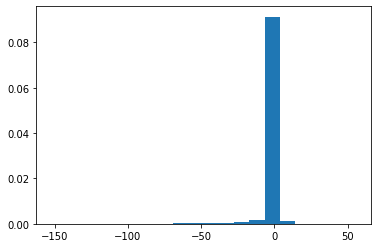

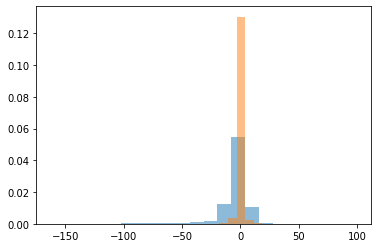

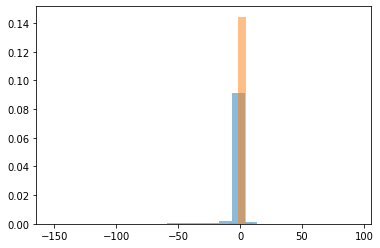

In [29]:
#sanity check single model

interaction_analysis = negcontrol_results["negcontrol_model-arch1_l1reg-0.0_seed100_nespm.h5"]
#interaction_analysis = poscontrol_results["poscontrol_model-arch1_l1reg-0.0_seed100_amzeg.h5"]

%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats

print(scipy.stats.wilcoxon(
    x=interaction_analysis.test_toanalyze_lossimprovement,
    alternative="greater"))
print(np.median(interaction_analysis.test_toanalyze_lossimprovement))
plt.hist(interaction_analysis.test_toanalyze_lossimprovement, density=True, bins=20)
plt.show()

plt.hist(interaction_analysis.test_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_interactioneffectdata.inter_eff,
         density=True, bins=20, alpha=0.5)
plt.show()

"""plt.hist(np.abs(interaction_analysis.test_toanalyze_interactioneffectdata.inter_eff)/
         (np.abs(interaction_analysis.test_toanalyze_interactioneffectdata.A_main_eff
          + interaction_analysis.test_toanalyze_interactioneffectdata.B_main_eff)),
         density=True, bins=20, alpha=0.5)
plt.hist(np.abs(interaction_analysis.shuff_toanalyze_interactioneffectdata.inter_eff)/
         (np.abs(interaction_analysis.shuff_toanalyze_interactioneffectdata.A_main_eff
          + interaction_analysis.shuff_toanalyze_interactioneffectdata.B_main_eff)),
         density=True, bins=20, alpha=0.5)
plt.show()""" #doesn't work cos sum on main off on dn shuff seqs can be tiny

#print(np.median(interaction_analysis.test_toanalyze_lossimprovement))
#print(np.median(interaction_analysis.shuff_toanalyze_lossimprovement))

plt.hist(interaction_analysis.test_toanalyze_lossimprovement,
         density=True, bins=20, alpha=0.5)
plt.hist(interaction_analysis.shuff_toanalyze_lossimprovement,
         density=True, bins=20, alpha=0.5)
plt.show()